In [1]:
# ==== Core ====
import os
from pathlib import Path
import warnings
from collections import Counter

import numpy as np
import pandas as pd

# ==== Visualization ====
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
# اگر تعاملی لازم دارید، باز کنید:
# import plotly.express as px
# import plotly.graph_objs as go
# from plotly.subplots import make_subplots

# ==== Sci/Stats ====
import scipy as sci
from scipy import stats

# ==== ML: Preprocessing & Pipelines ====
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, ShuffleSplit, StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ==== ML: Models ====
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    VotingClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

# ==== ML: Metrics ====
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    confusion_matrix, classification_report
)

# ==== Deep Learning (یکپارچه با tf.keras) ====
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

# ==== Ready-to-use base models list ====
knn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
models = [knn, nb, dt, rf]


In [2]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [10]:
# select categorical data
df_cat = data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                 'smoking_status', 'stroke']]

In [11]:
for i in df_cat.columns:
    print(df_cat[i].unique())

['Male' 'Female' 'Other']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


## visualisation

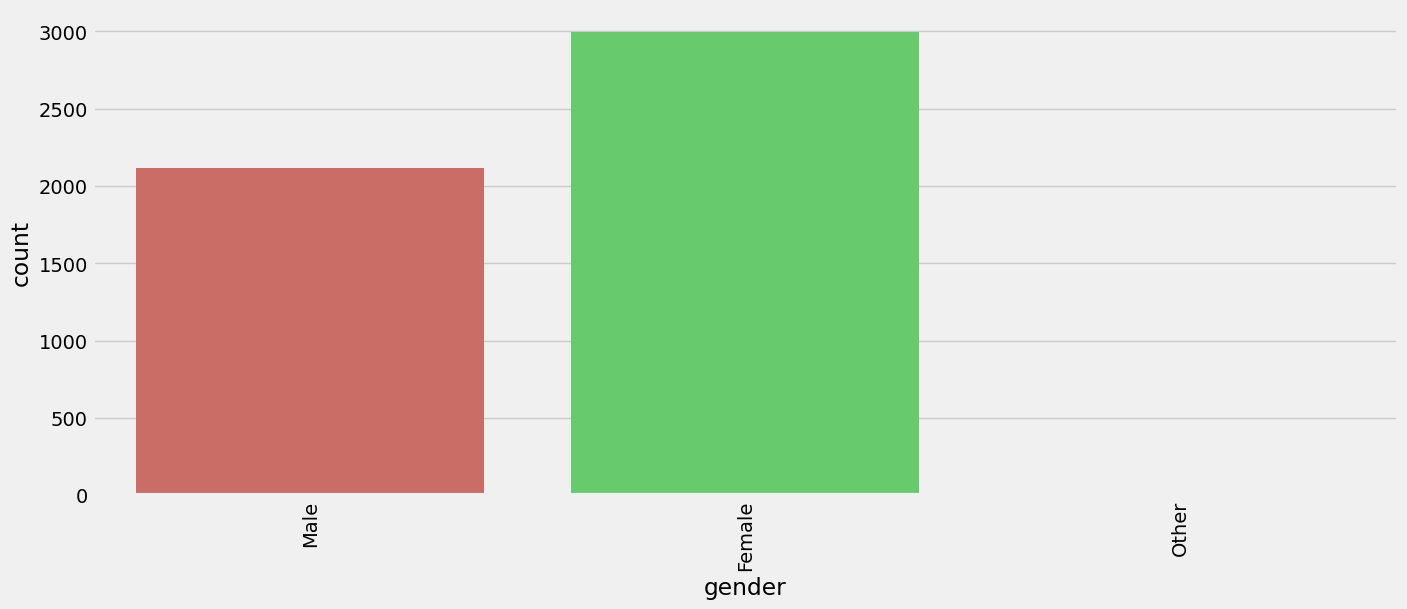

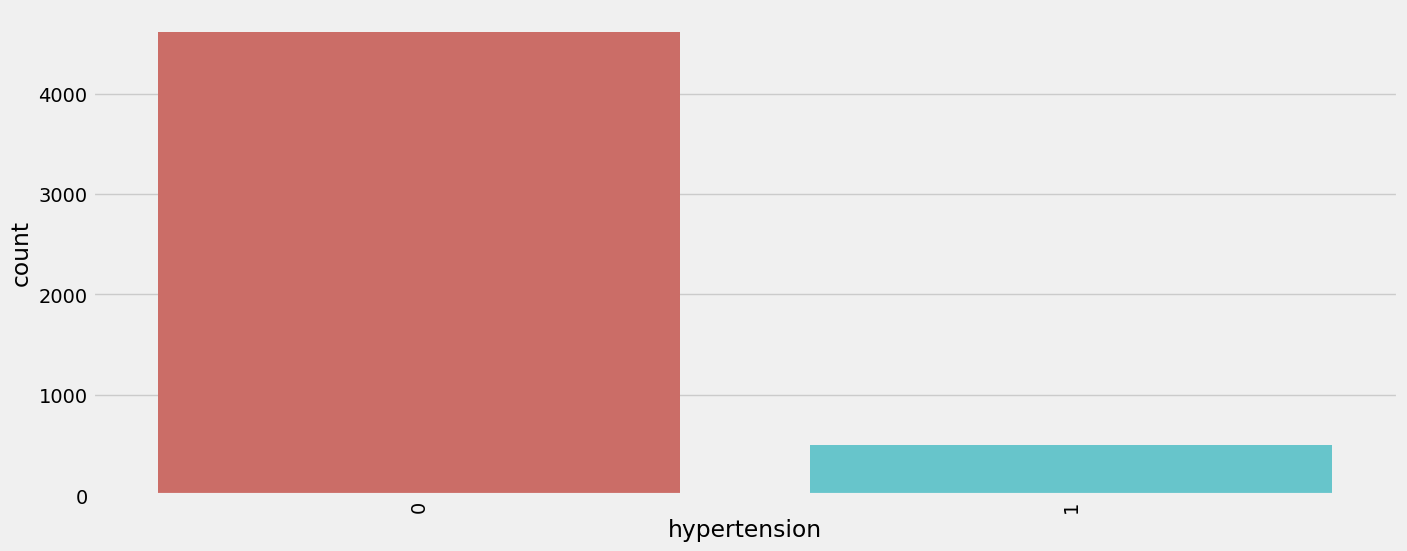

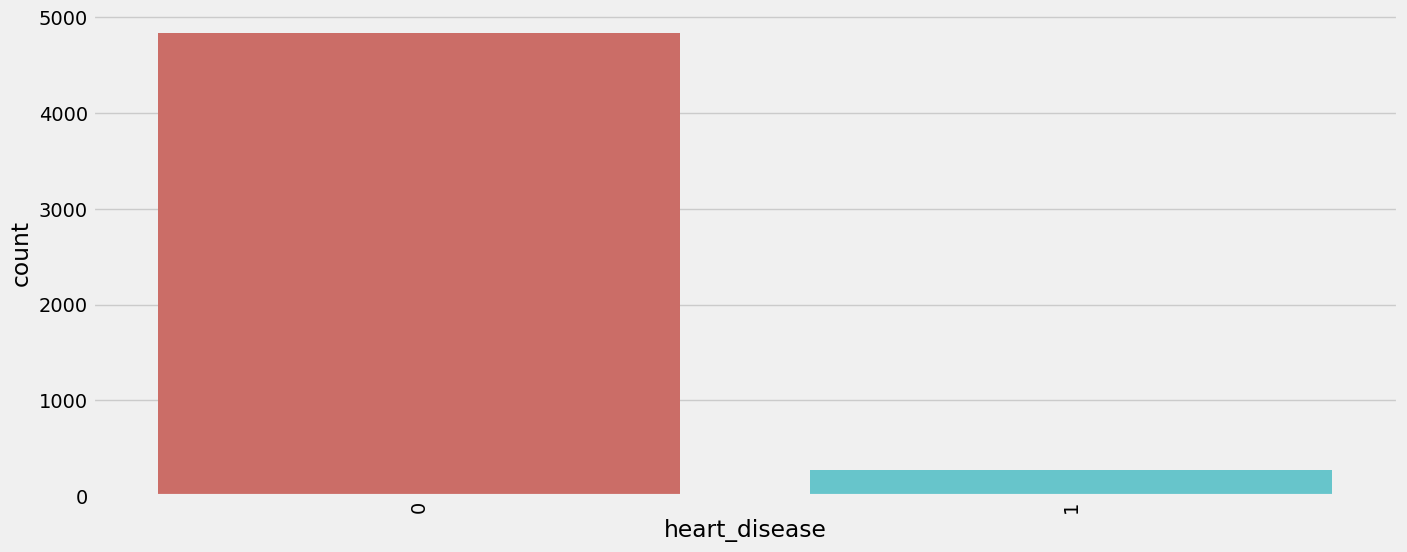

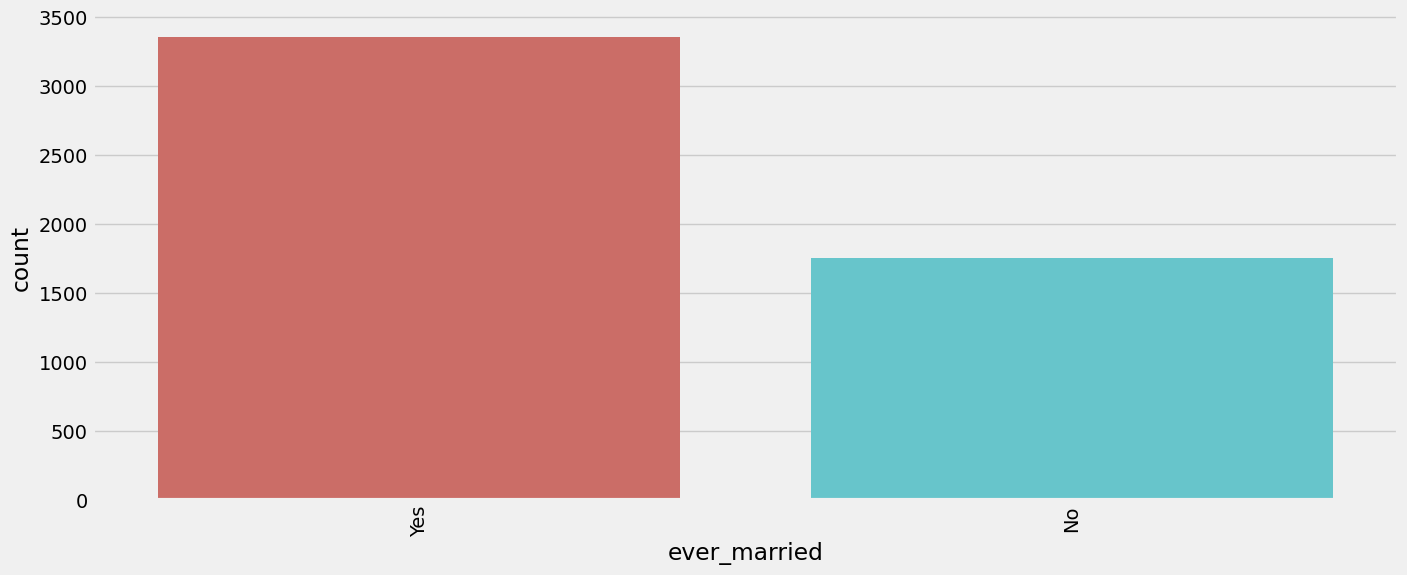

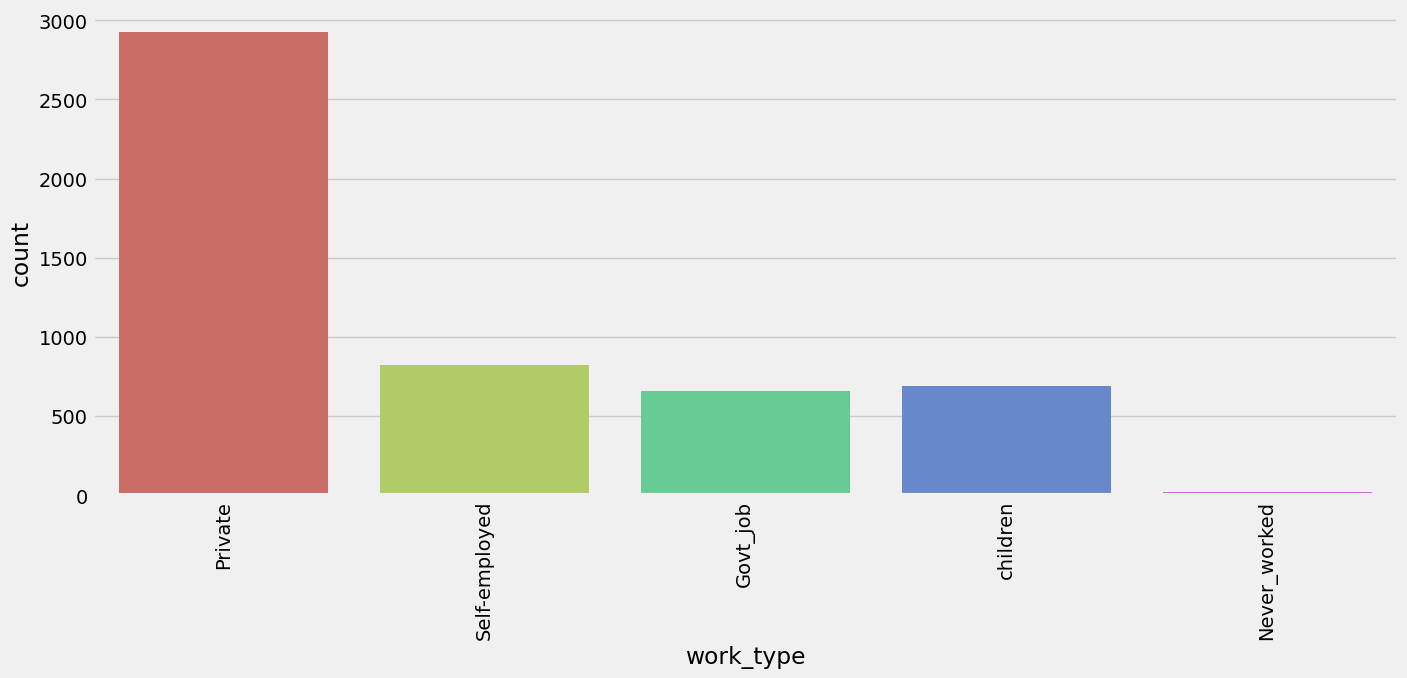

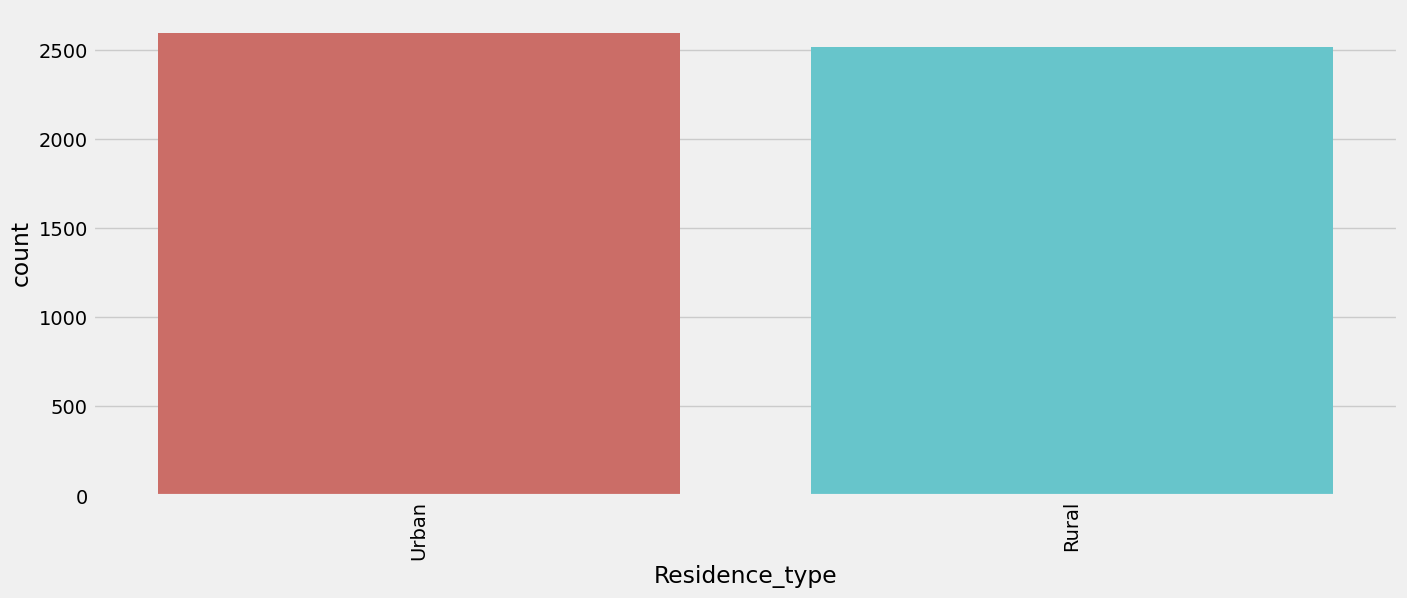

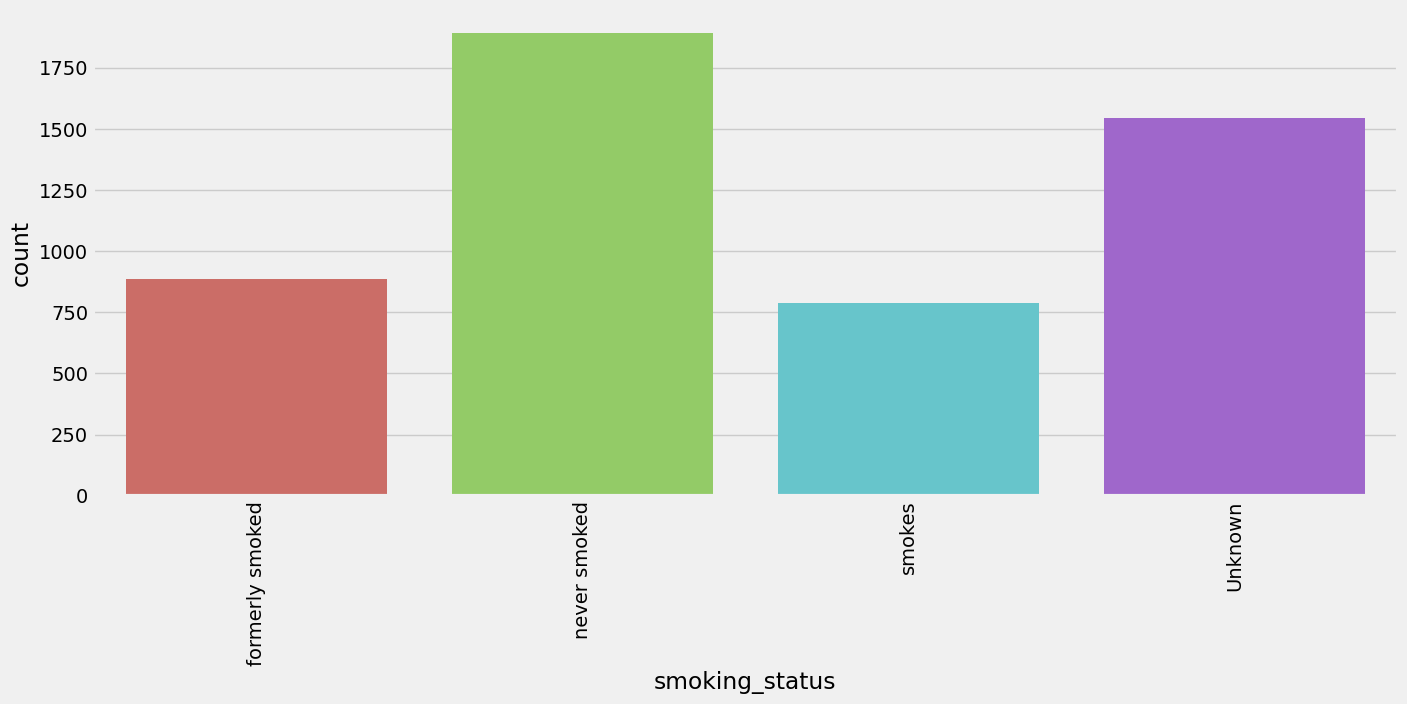

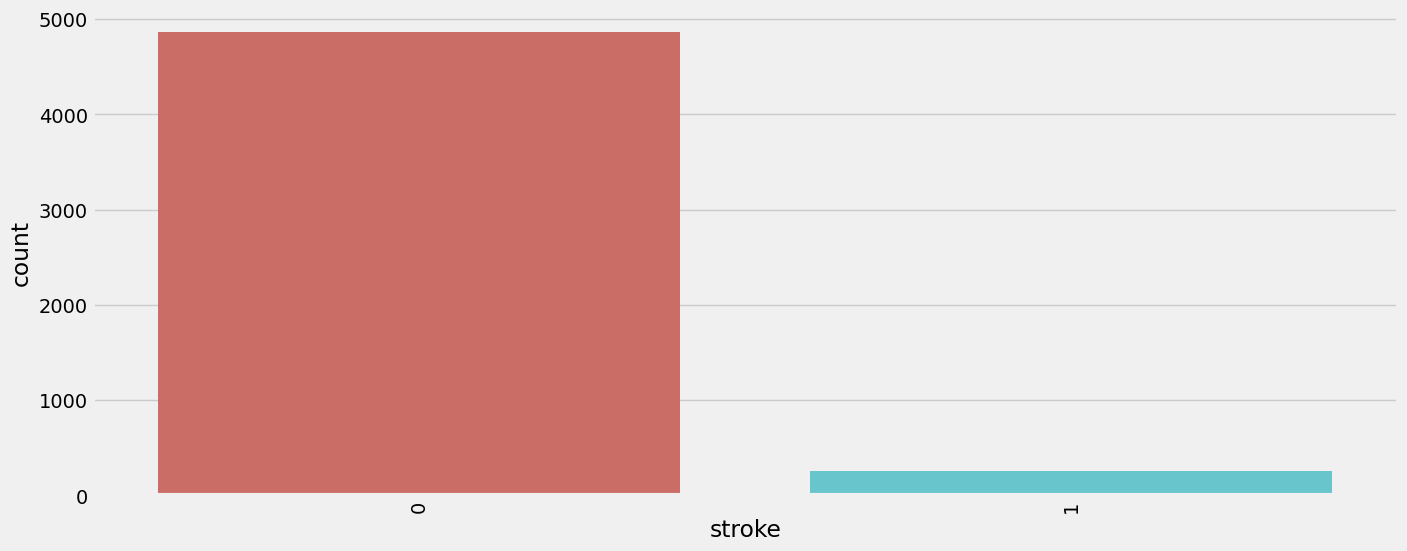

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in df_cat.columns:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=i, data=df_cat, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

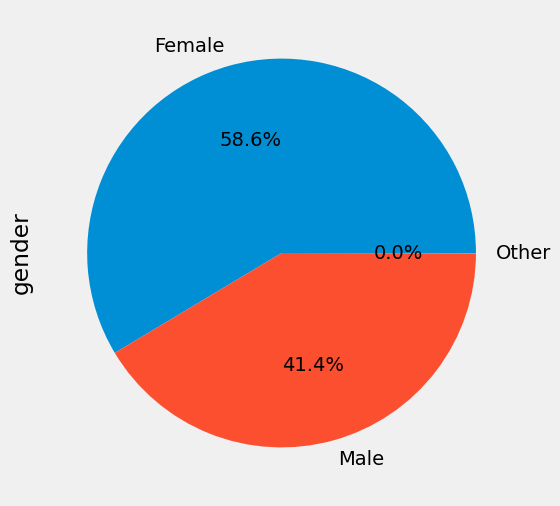

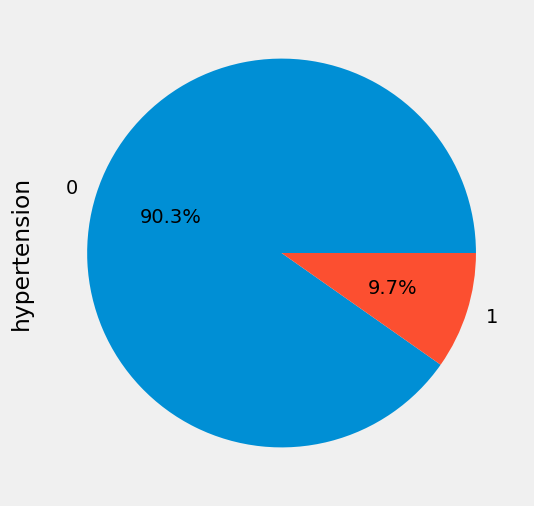

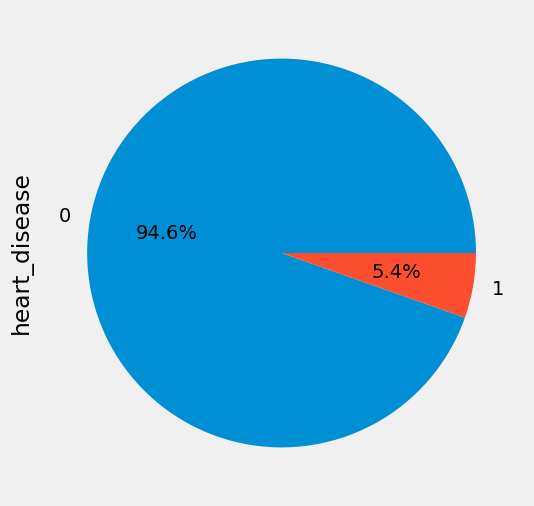

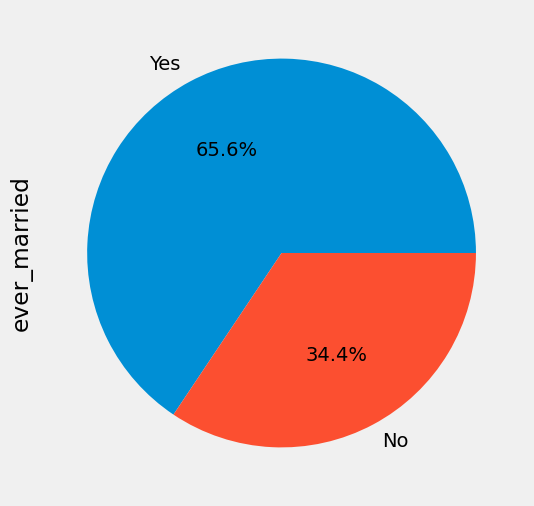

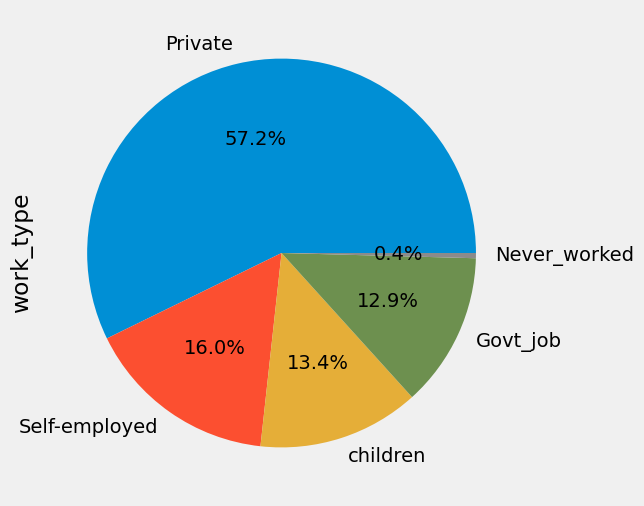

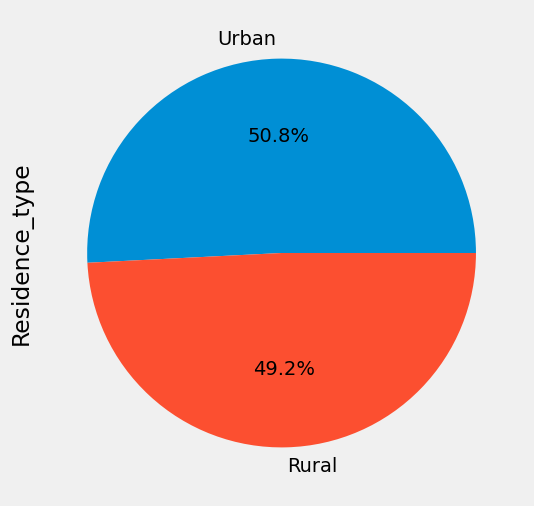

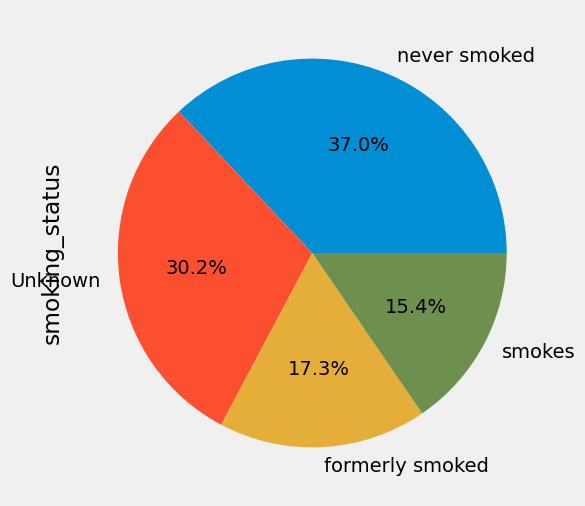

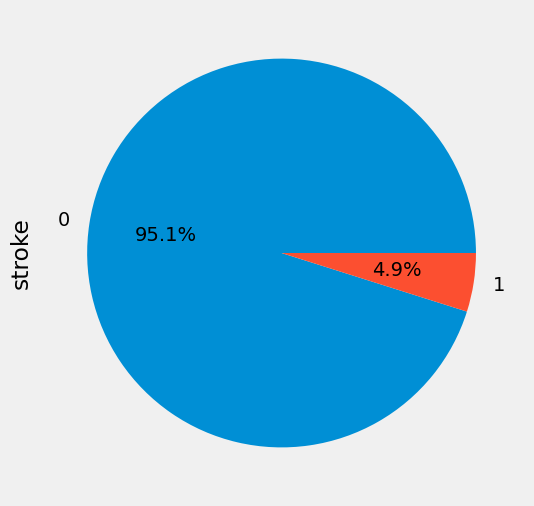

In [14]:
for i in df_cat.columns:
    plt.figure(figsize = (15,6))
    df_cat[i].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
    plt.xticks(rotation = 90)
    plt.show()

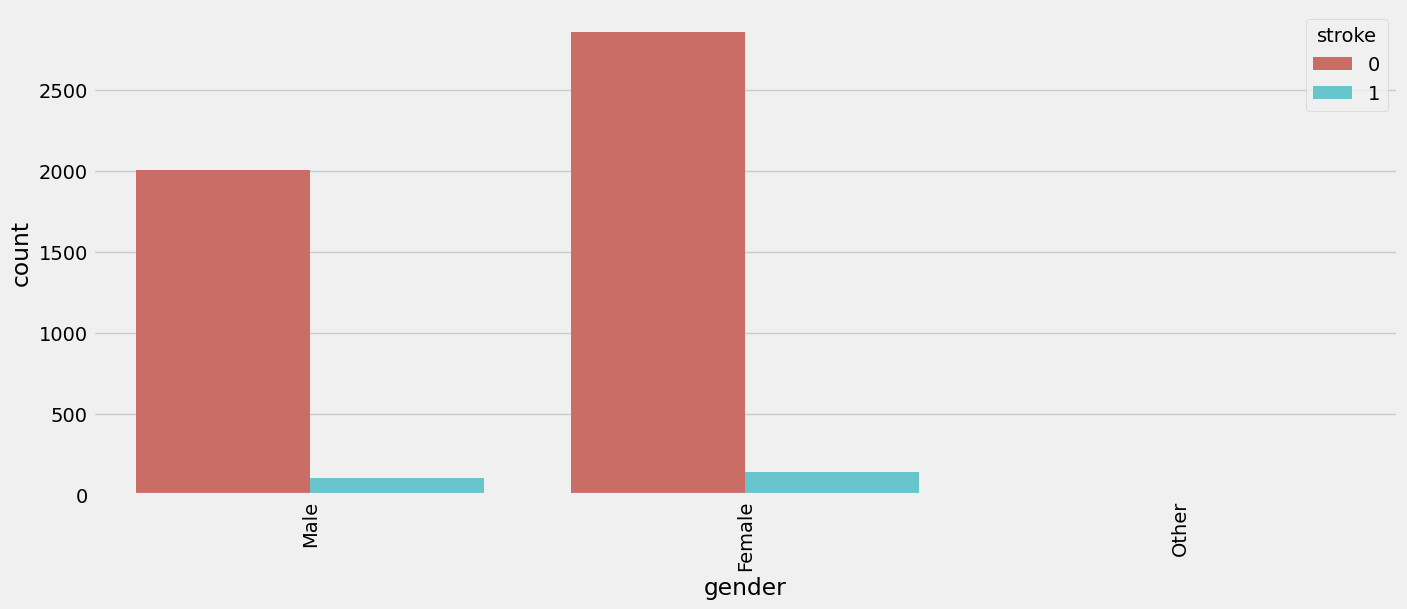

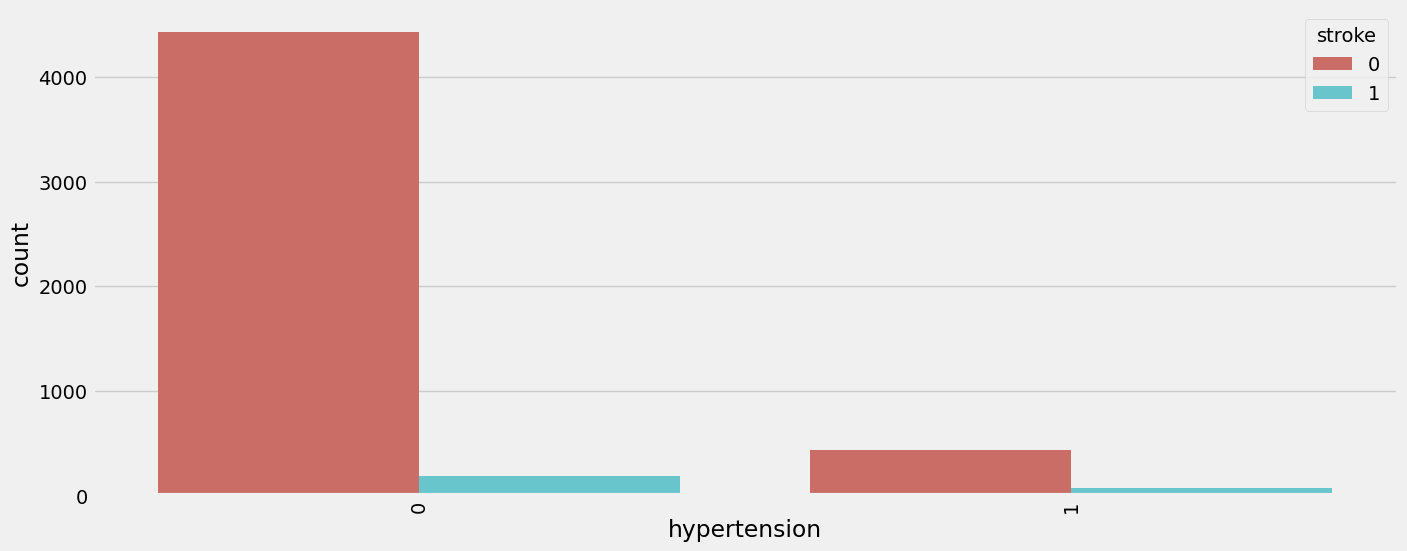

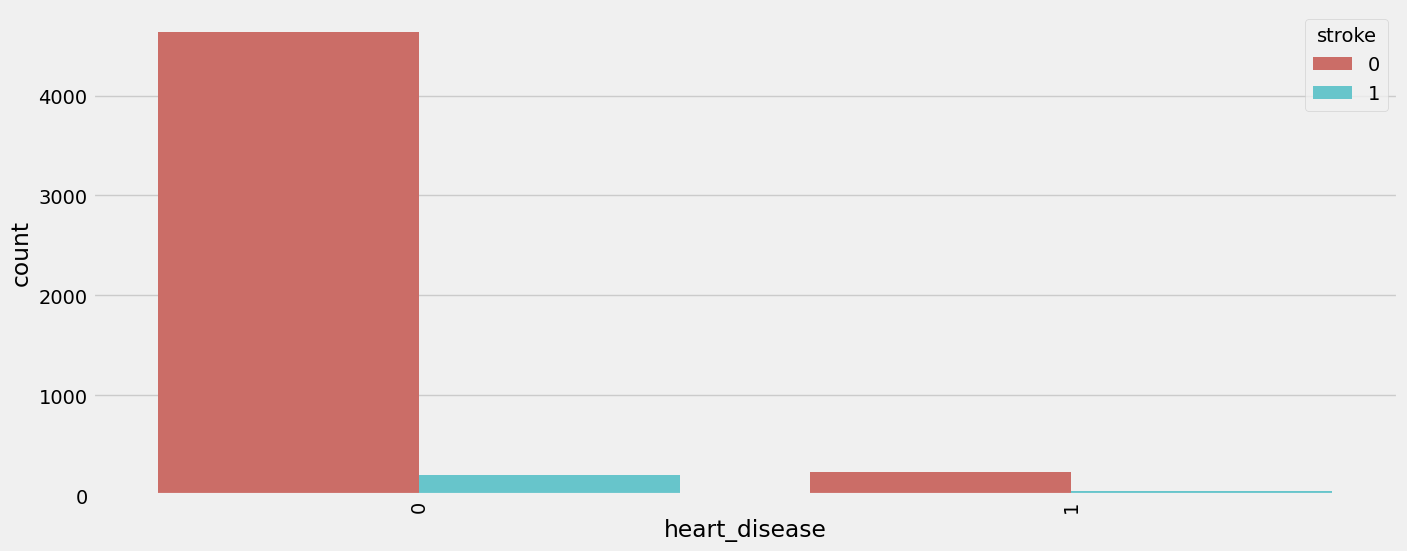

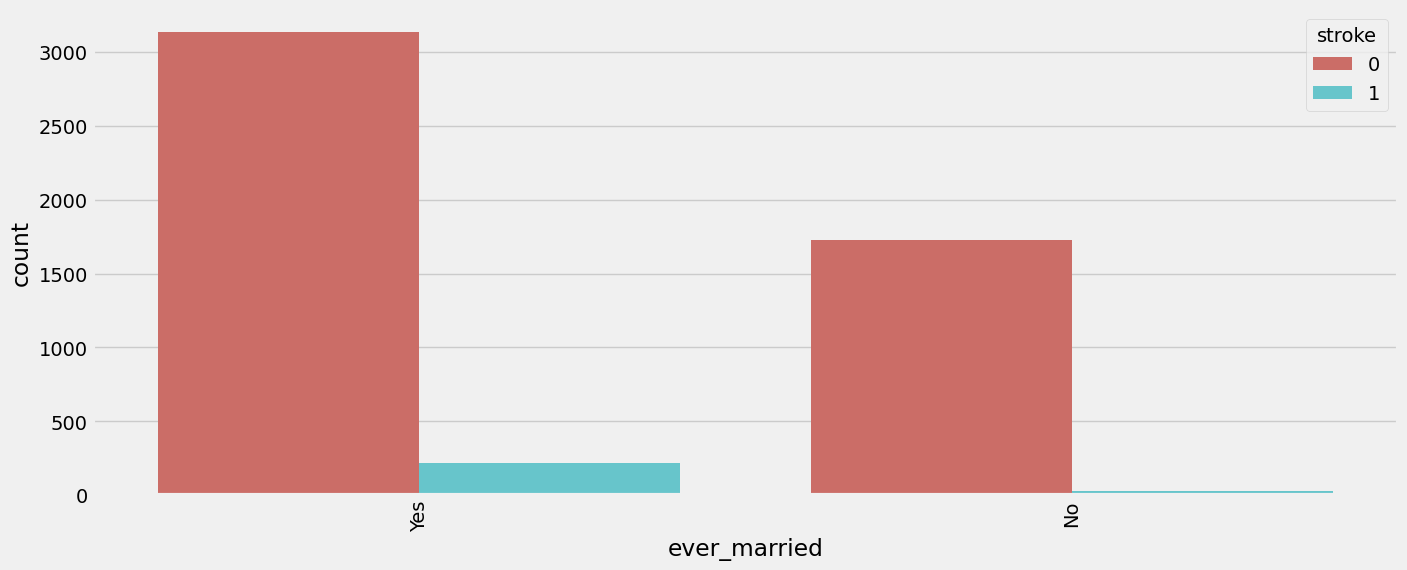

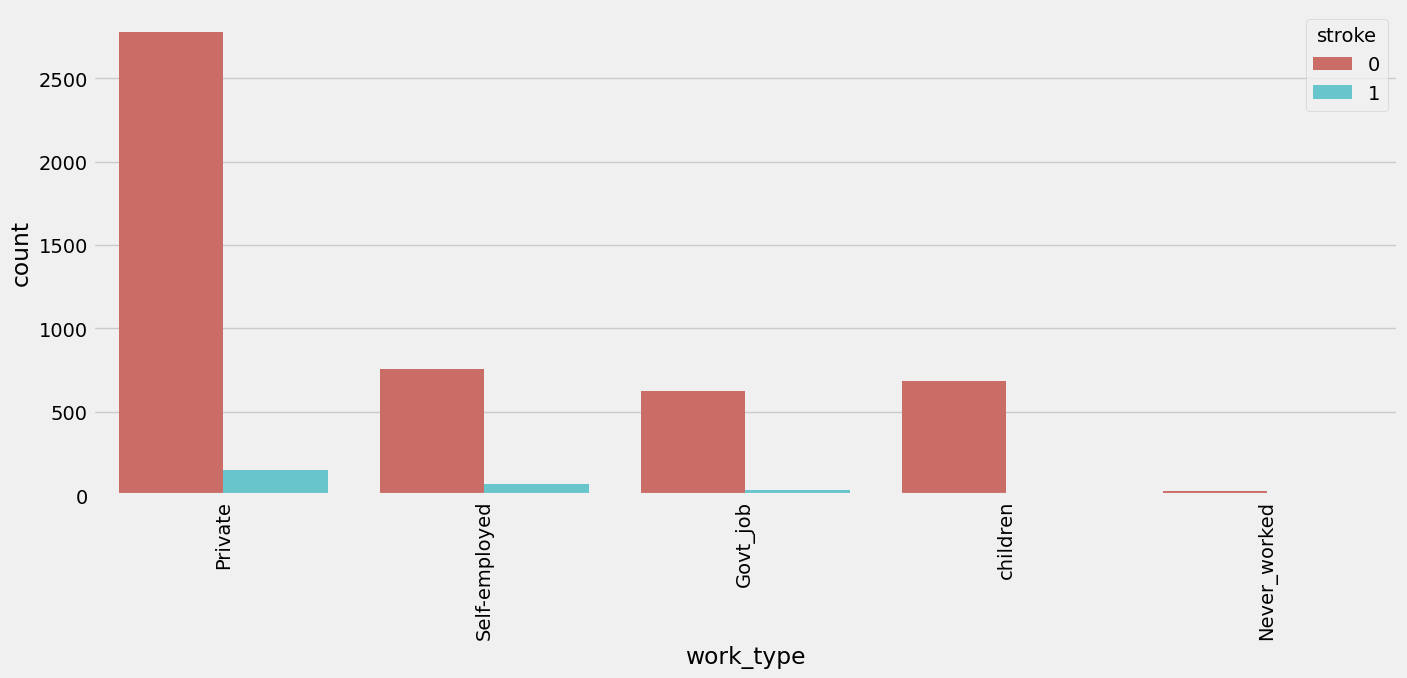

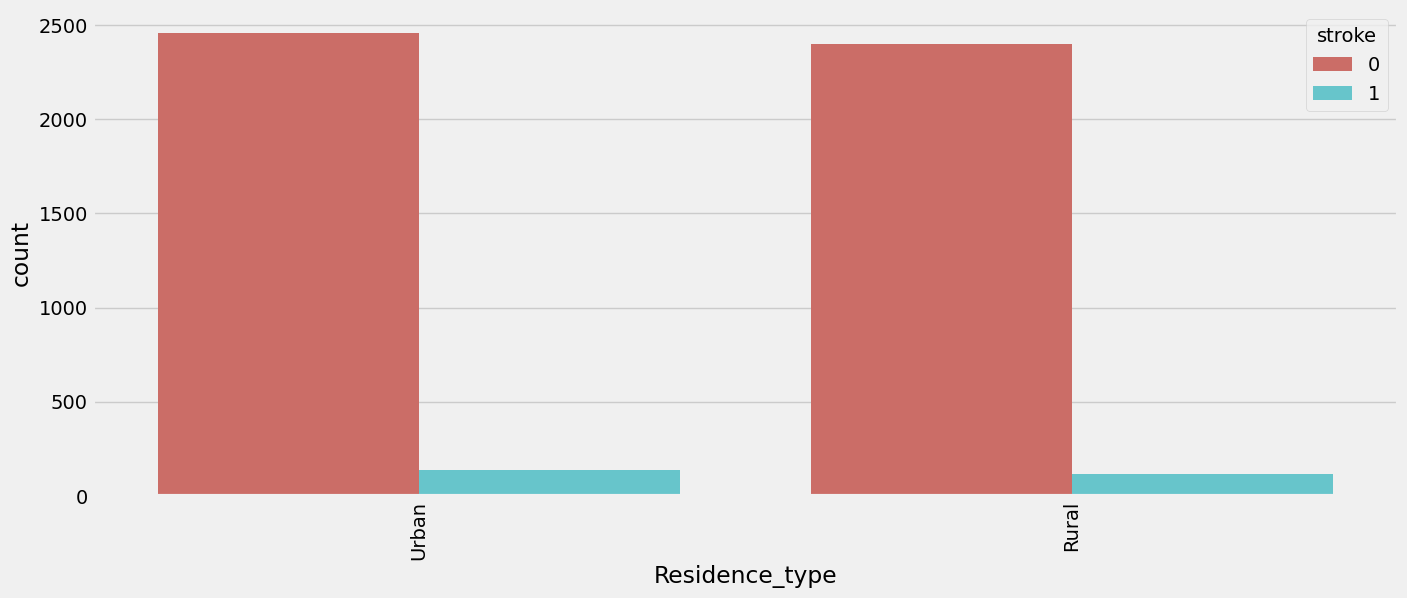

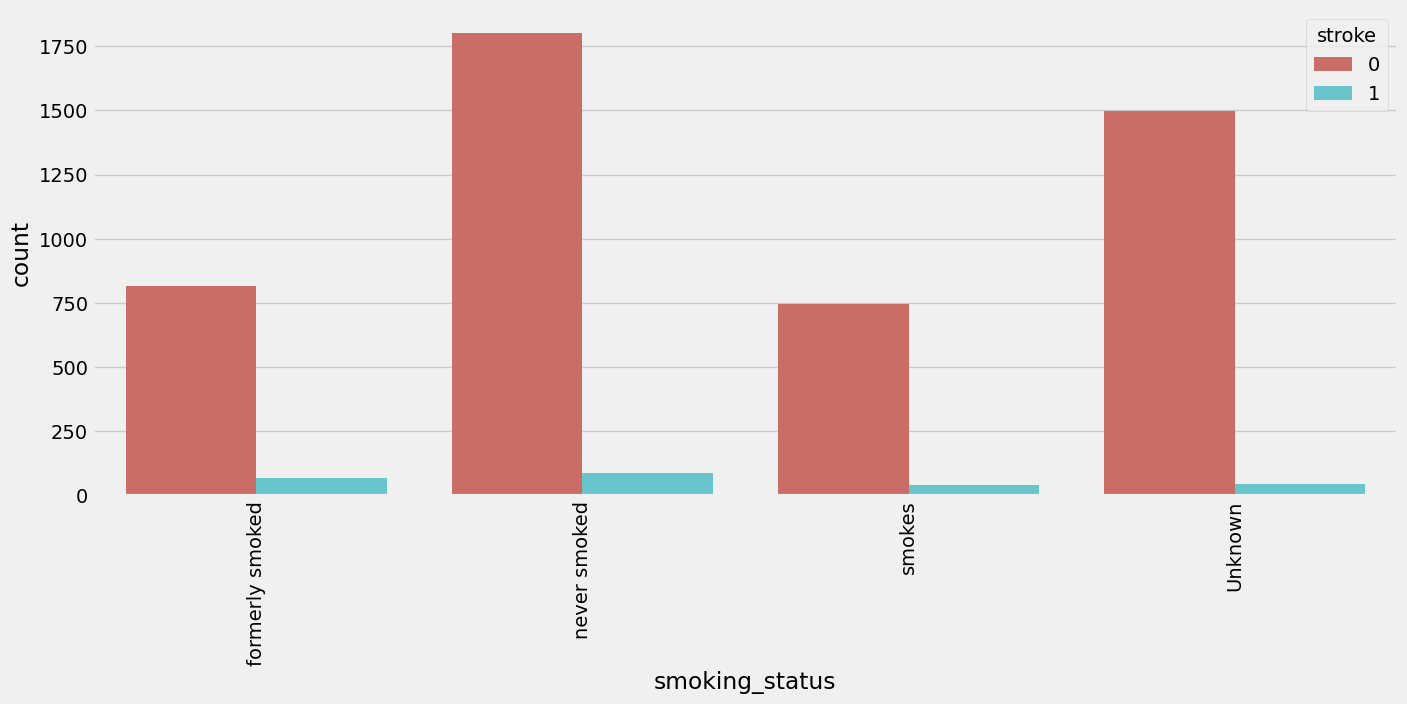

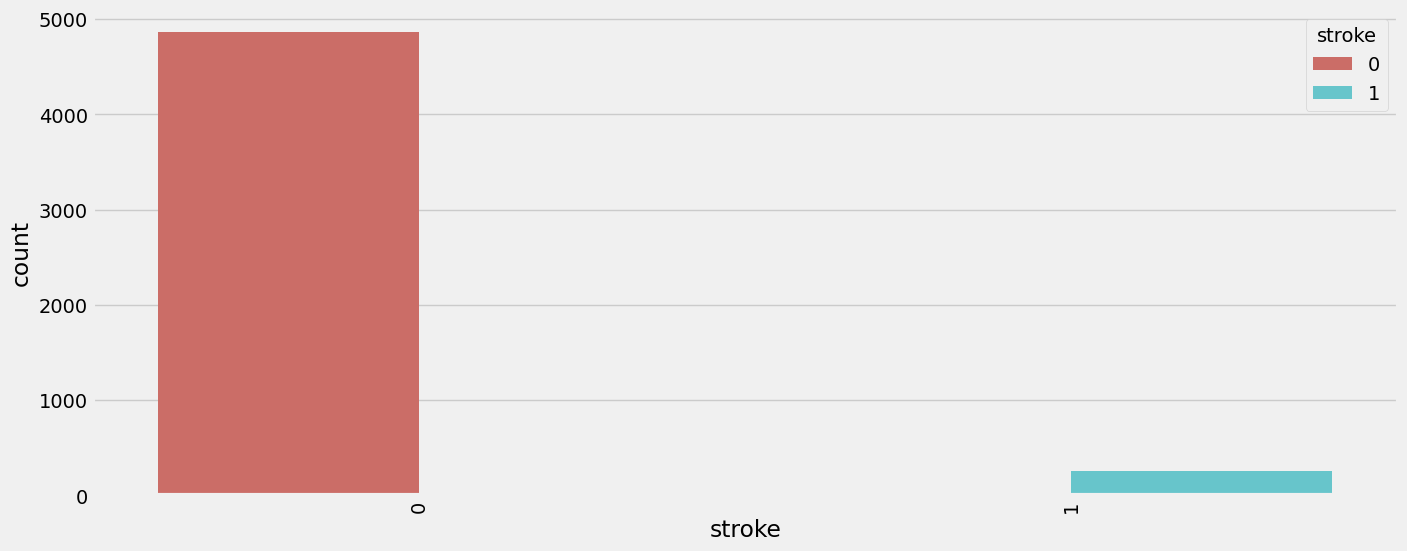

In [15]:
for i in df_cat.columns:
    plt.figure(figsize = (15,6))
    sns.countplot(x=i, data = df_cat, hue = 'stroke' , palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [16]:
# Assuming 'gender' and 'stroke' are columns in your DataFrame df
gender = data.groupby(data['gender'])['stroke'].sum().reset_index()
# Change to less vibrant colors
less_vibrant_colors = ['#94C4E5', '#FFD1DC']
fig = px.pie(gender, values='stroke', names='gender', 
             title='The Proportion of Stroke among Gender', 
             color_discrete_sequence=less_vibrant_colors)
fig.show()
#################################################################
work_type = data.groupby(data['work_type'])['stroke'].sum().reset_index()
fig = px.pie(work_type, values='stroke', names='work_type', 
             title='Work type of people who had a stroke', 
             color_discrete_sequence=['palegreen', 'paleturquoise', 'thistle', 'moccasin'])
# Create a hole in the middle of the pie chart to simulate a "pull" effect
fig.update_traces(hole=0.2)
fig.show()
##################################################################
smoke = data.groupby(data['smoking_status'])['stroke'].sum().reset_index()
# Define your colors
colors2 = ['palegreen', 'paleturquoise', 'thistle', 'moccasin']
# Create a pie chart
fig = px.pie(smoke, values='stroke', names='smoking_status', 
             title='Smoking status of people who had a stroke', 
             color_discrete_sequence=colors2)
# Add pull effect using 'pull' attribute in the data dictionary
fig.update_traces(pull=[0.02, 0.02, 0.1, 0.02])
fig.show()
####################################################################
Residence = data.groupby(data['Residence_type'])['stroke'].sum().reset_index()
# Define your colors
colors2 = ['palegreen', 'paleturquoise']

# Create a pie chart
fig = px.pie(Residence, values='stroke', names='Residence_type', 
             title='Residence area of people who had a stroke', 
             color_discrete_sequence=colors2)
# Add pull effect using 'pull' attribute in the data dictionary
fig.update_traces(pull=[0.02, 0.02], hole=0.3)
fig.show()
###################################################################
Married = data.groupby(data['ever_married'])['stroke'].sum().reset_index()
# Define your colors
colors2 = ['palegreen', 'paleturquoise']
# Create a pie chart
fig = px.pie(Married, values='stroke', names='ever_married', 
             title='Marriage status of people who had a stroke', 
             color_discrete_sequence=colors2)
# Add pull effect using 'pull' attribute in the data dictionary
fig.update_traces(pull=[0.02, 0.02], hole=0.3)
fig.show()

NameError: name 'px' is not defined

Text(0.5, 1.0, 'Imbalance data')

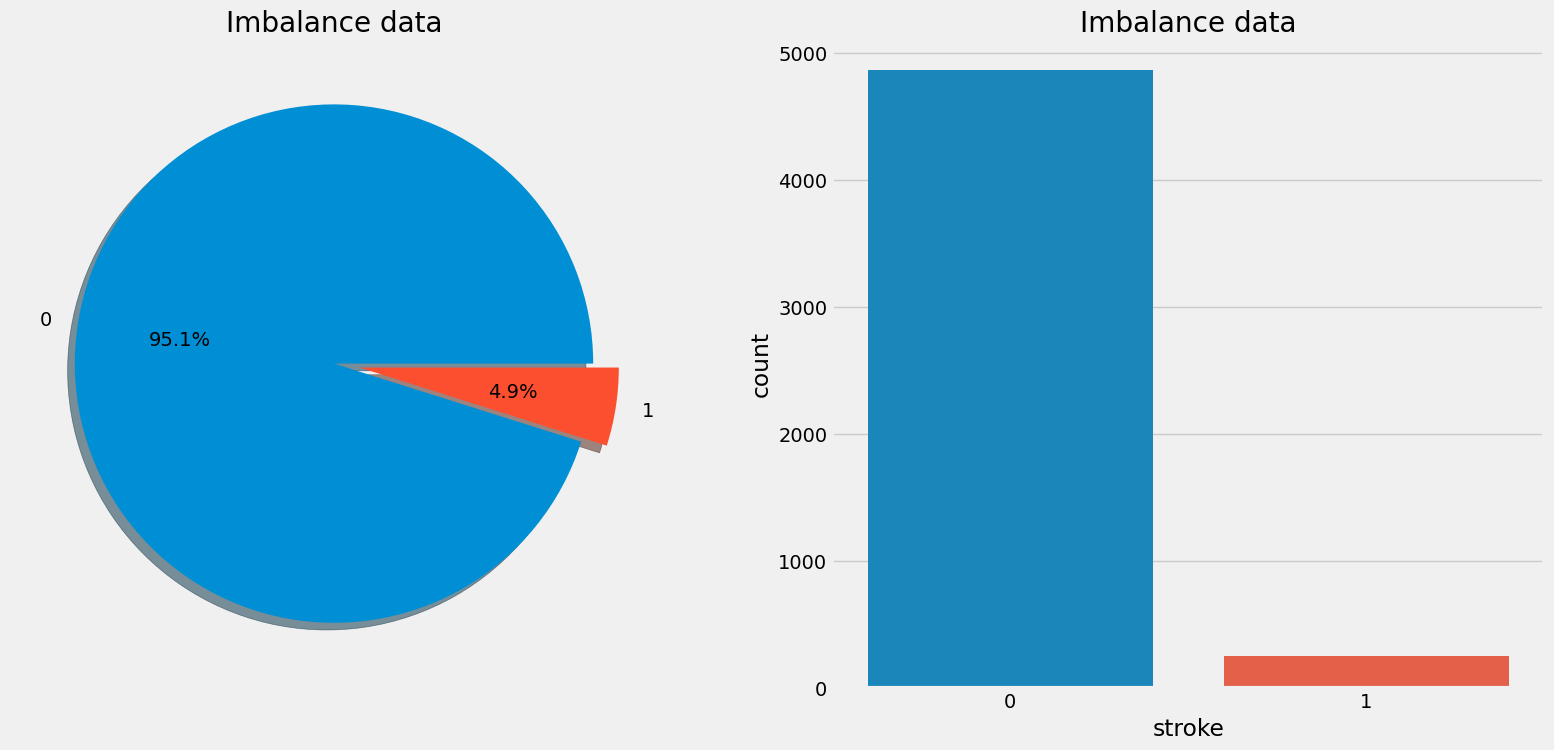

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['stroke'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Imbalance data')
ax[0].set_ylabel('')
sns.countplot(x='stroke',data=data,ax=ax[1])
ax[1].set_title('Imbalance data')

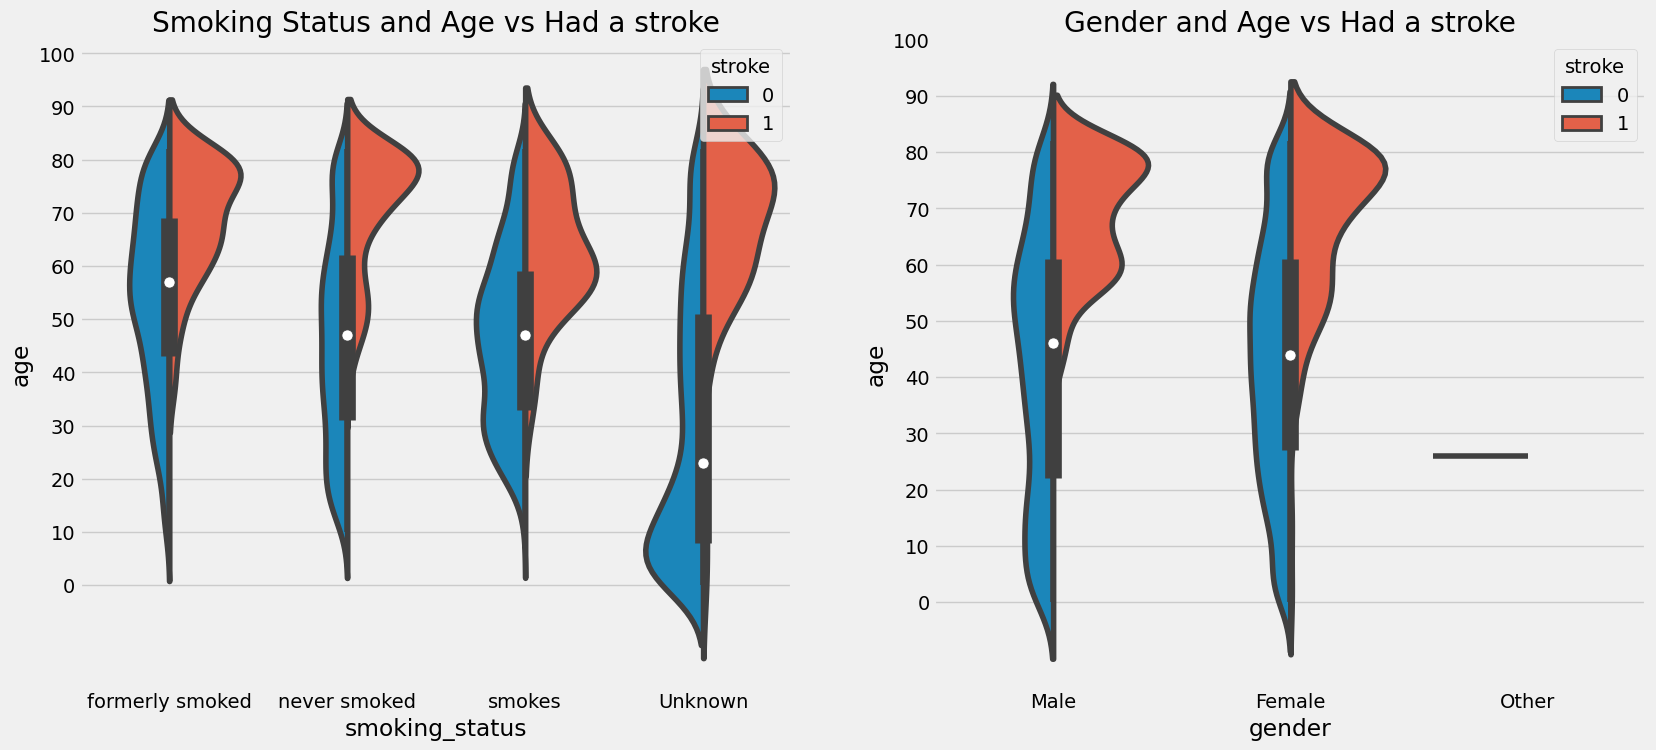

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot(x="smoking_status", y="age", hue="stroke", data=data, split=True, ax=ax[0])
ax[0].set_title('Smoking Status and Age vs Had a stroke')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x="gender", y="age", hue="stroke", data=data, split=True, ax=ax[1])
ax[1].set_title('Gender and Age vs Had a stroke')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

It can be seen that if the age increases, the chance of having stroke increases too. For both features smoking_status and gender above 40 years old people have a high chance of having a stroke. It seems like most people had a stroke at the age of 80.

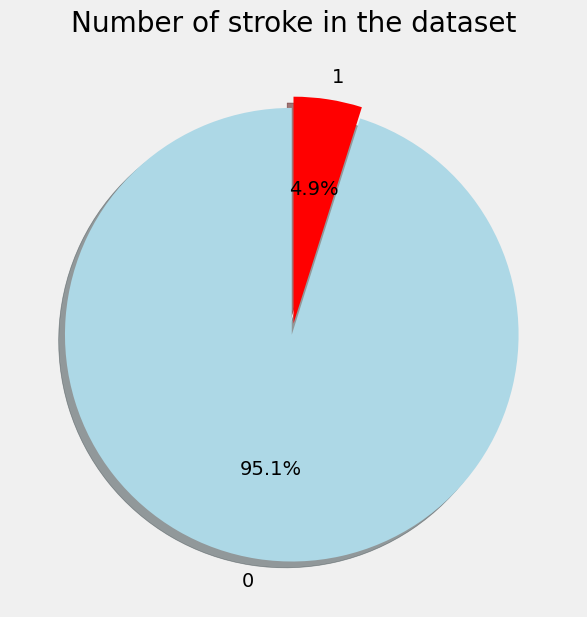

In [19]:
labels =data['stroke'].value_counts(sort = True).index
sizes = data['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

In [20]:
%%html
<style>
/* تغییر فونت به Times New Roman */
body {
    font-family: "Times New Roman", Times, serif;
    line-height: 1.6;
}
/* تغییر زبان به انگلیسی */
:lang(fa) {
    direction: ltr;
}
</style>
<p lang="en">This is a sample text in English with the Times New Roman font.</p>


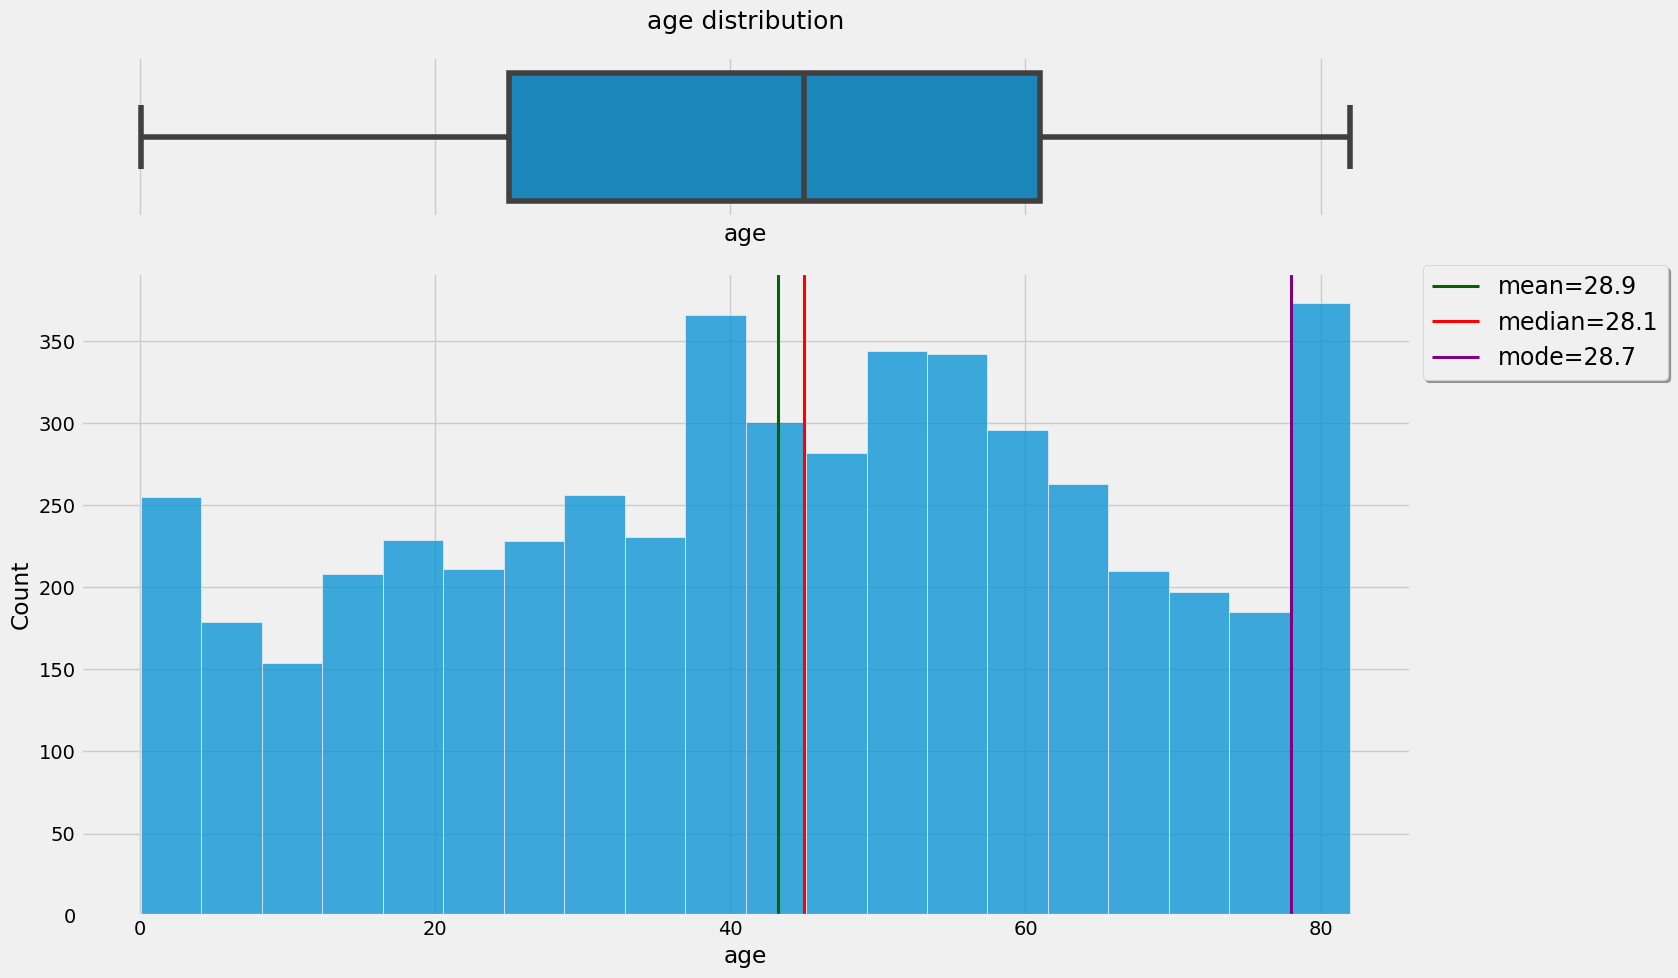

In [19]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(17,10),gridspec_kw={"height_ratios": (.2, .8)})
ax[0].set_title('age distribution',fontsize=18,pad=20)
sns.boxplot(x='age', data=data, ax=ax[0])
ax[0].set(yticks=[])
sns.histplot(x='age', data=data, ax=ax[1])
plt.axvline(data['age'].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(data['bmi'].mean(),1)))
plt.axvline(data['age'].median(), color='red', linewidth=2.2, label='median='+ str(np.round(data['bmi'].median(),1)))
plt.axvline(data['age'].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(data['bmi'].mode()[0]))
plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
plt.tight_layout()
plt.show()

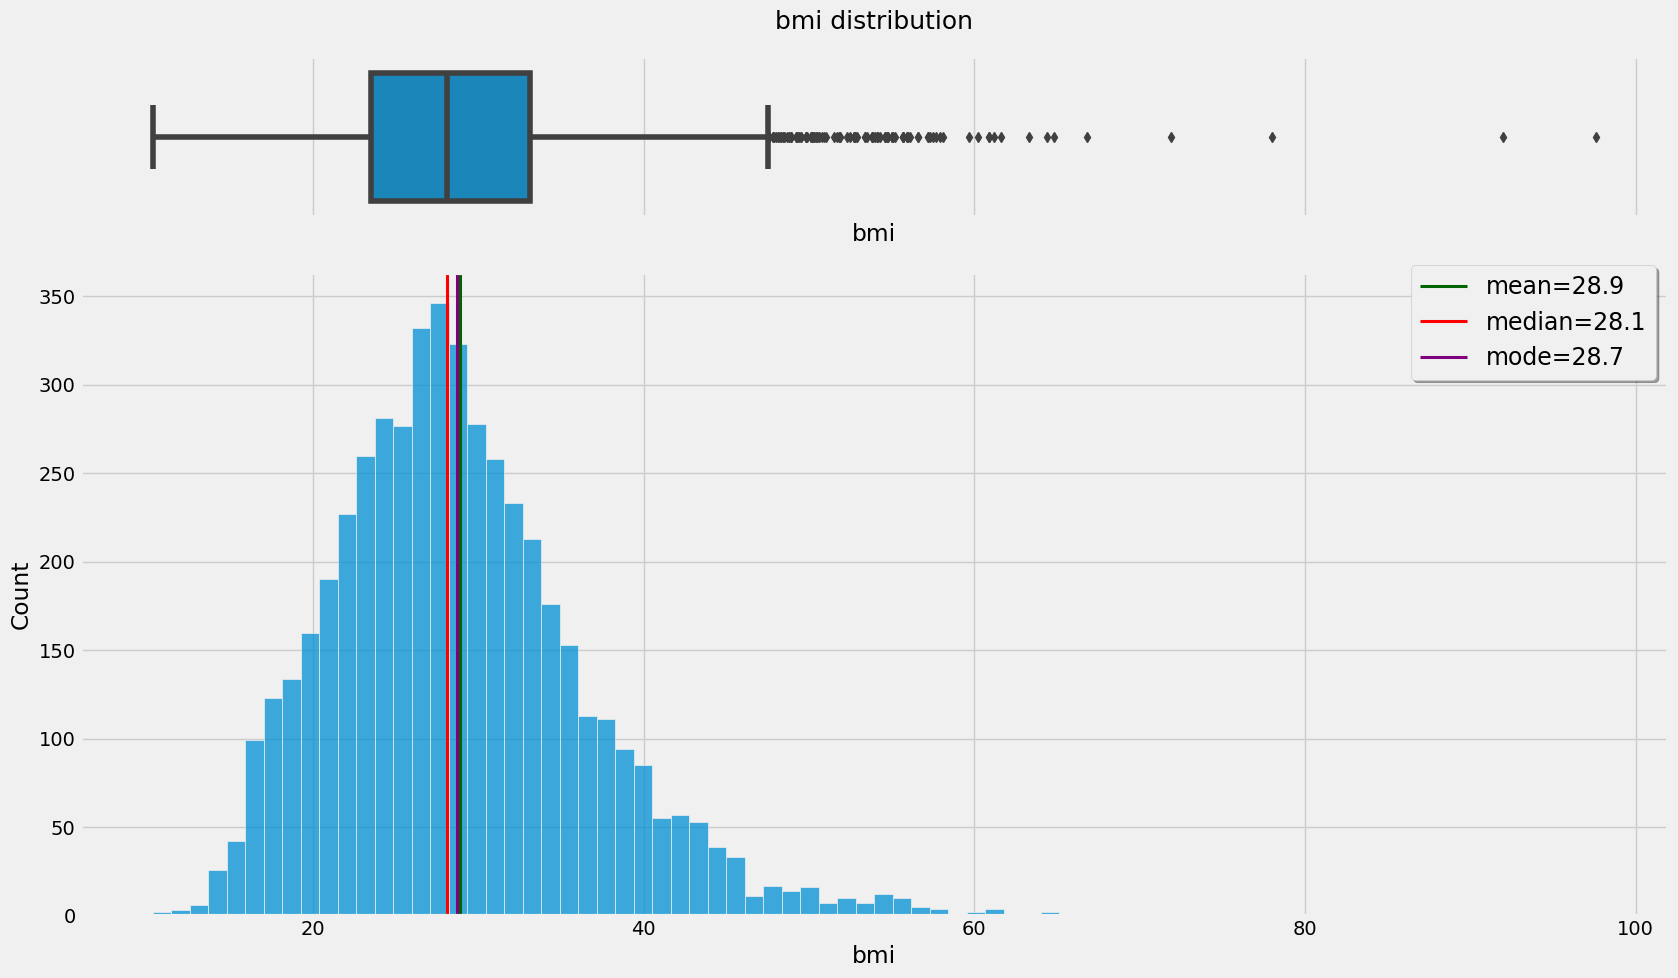

In [20]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(17,10),gridspec_kw={"height_ratios": (.2, .8)})
ax[0].set_title('bmi distribution',fontsize=18,pad=20)
sns.boxplot(x='bmi', data=data, ax=ax[0])
ax[0].set(yticks=[])
sns.histplot(x='bmi', data=data, ax=ax[1])
plt.axvline(data['bmi'].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(data['bmi'].mean(),1)))
plt.axvline(data['bmi'].median(), color='red', linewidth=2.2, label='median='+ str(np.round(data['bmi'].median(),1)))
plt.axvline(data['bmi'].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(data['bmi'].mode()[0]))
plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
plt.tight_layout()
plt.show()

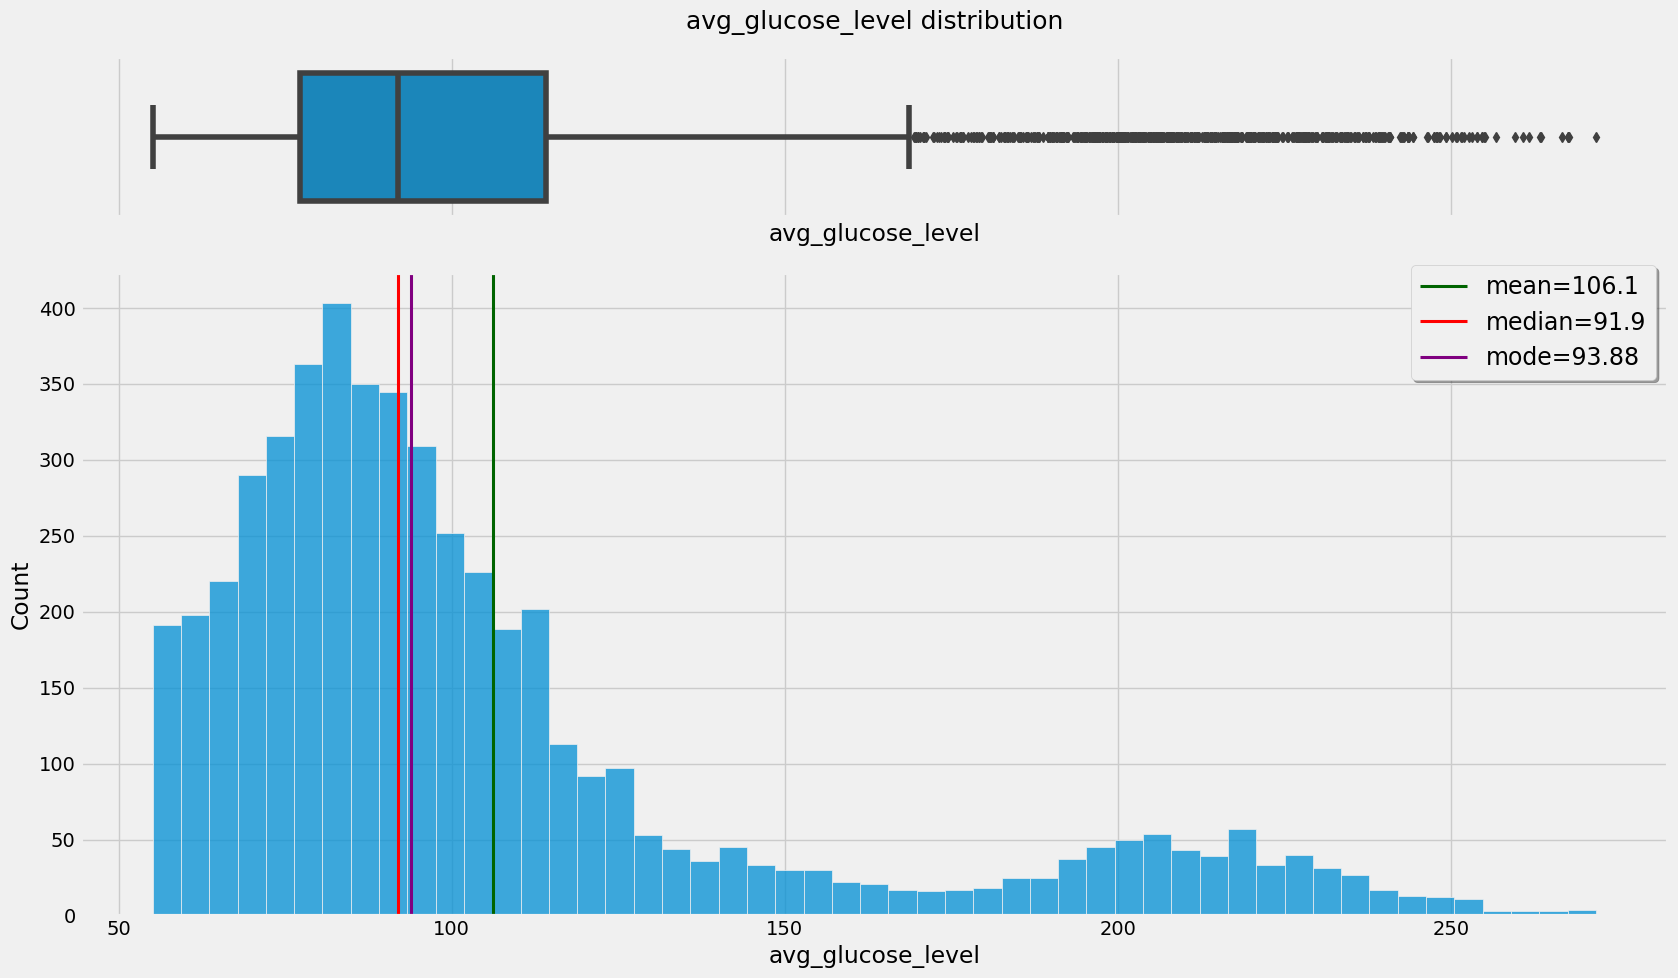

In [21]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(17,10),gridspec_kw={"height_ratios": (.2, .8)})
ax[0].set_title('avg_glucose_level distribution',fontsize=18,pad=20)
sns.boxplot(x='avg_glucose_level', data=data, ax=ax[0])
ax[0].set(yticks=[])
sns.histplot(x='avg_glucose_level', data=data, ax=ax[1])
plt.axvline(data['avg_glucose_level'].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(data['avg_glucose_level'].mean(),1)))
plt.axvline(data['avg_glucose_level'].median(), color='red', linewidth=2.2, label='median='+ str(np.round(data['avg_glucose_level'].median(),1)))
plt.axvline(data['avg_glucose_level'].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(data['avg_glucose_level'].mode()[0]))
plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
plt.tight_layout()
plt.show()

## Correlation with avg glucose level


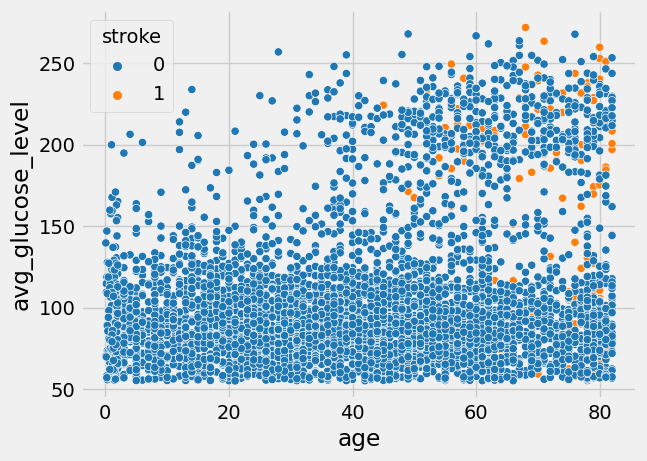

In [22]:
sns.scatterplot(x="age", y="avg_glucose_level", hue="stroke", data=data,palette="tab10");

## Visualize some features which maybe have correlation with avg glucose level

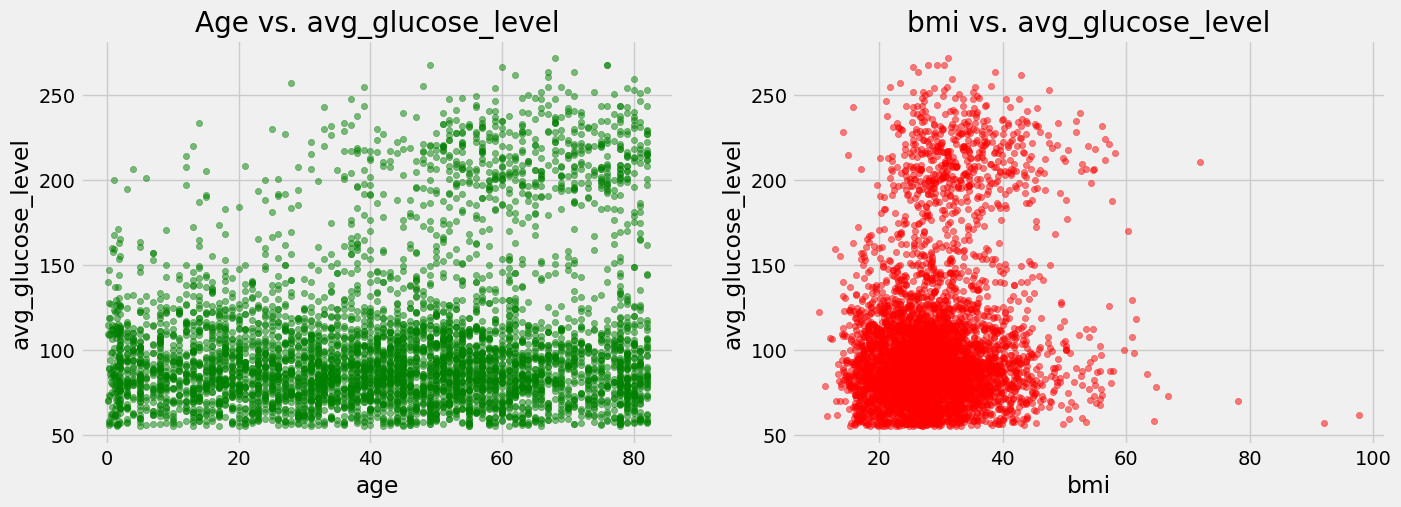

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
data.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
data.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

* Avg glucose level is high with old people
* BMI >40 have low avg glucose

# ************************************************************************************

## Heatmap Correlation

In [24]:
#  Using Lable encoding
le = LabelEncoder()
en_df = data.apply(le.fit_transform)
en_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3850,239,1,1
1,3610,0,82,0,0,1,3,0,3588,418,2,1
2,2151,1,101,0,1,1,2,0,2483,198,2,1
3,4226,0,70,0,0,1,2,1,3385,217,3,1
4,114,0,100,1,0,1,3,0,3394,113,2,1


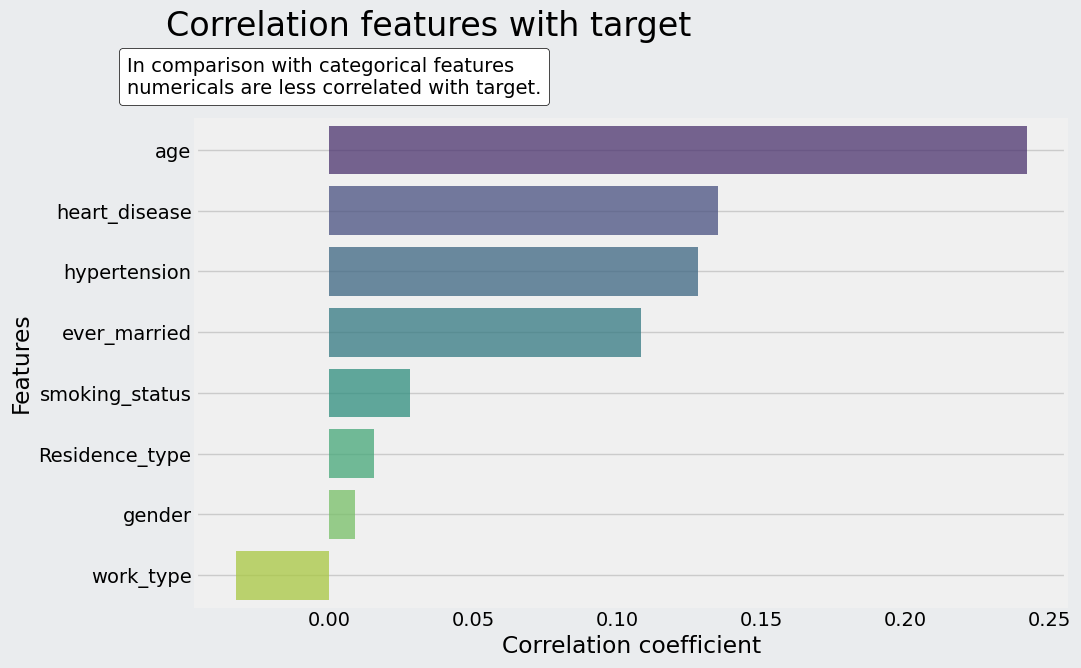

In [25]:
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']
from matplotlib.offsetbox import AnchoredText
correlation_table = []
for cols in features:
    y = en_df["stroke"]
    x = en_df[cols]
    corr = np.corrcoef(x, y)[1][0]
    dict ={
        'Features': cols,
        'Correlation coefficient' : corr,
        'Feat_type': 'numerical'
    }
    correlation_table.append(dict)
dF1 = pd.DataFrame(correlation_table)
fig = plt.figure(figsize=(10,6), facecolor='#EAECEE')
ax = sns.barplot(x="Correlation coefficient", y="Features", 
                     data=dF1.sort_values("Correlation coefficient", ascending=False),
                     palette='viridis', alpha=0.75)
ax.grid()
#ax.set_title("Correlation of numerical features with Target", fontsize=20, y=1.05)

title =  'Correlation features with target'
sub_title = 'In comparison with categorical features \
\nnumericals are less correlated with target.'

plt.gcf().text(0.05, 1.02, title, fontsize=24)
#plt.gcf().text(0.05, 0.9, sub_title, fontsize=14)

at1 = AnchoredText(sub_title,
                   loc='lower left', frameon=True,
                   bbox_to_anchor=(-0.1, 1.01),
                   bbox_transform=ax.transAxes,
                   #prop=dict(size=8),
                   )
at1.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at1)

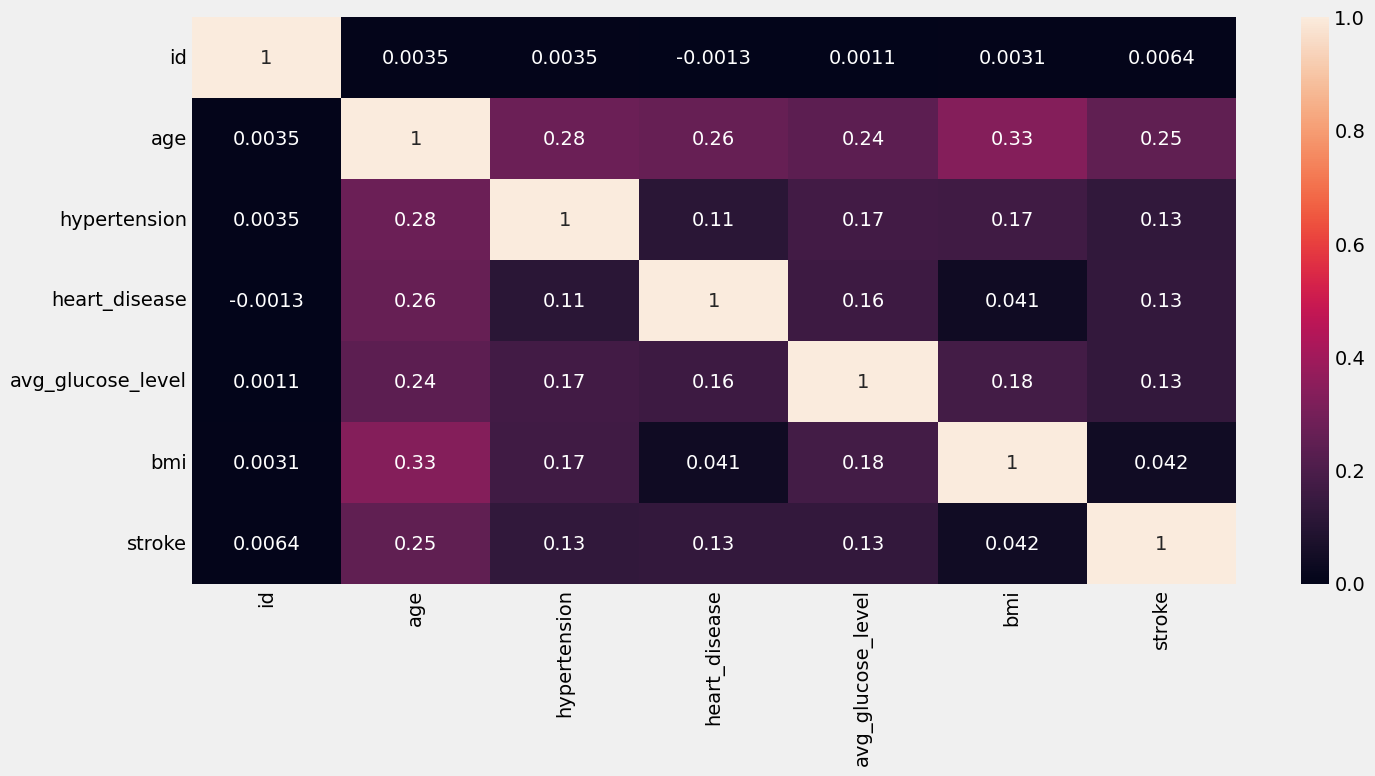

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True);

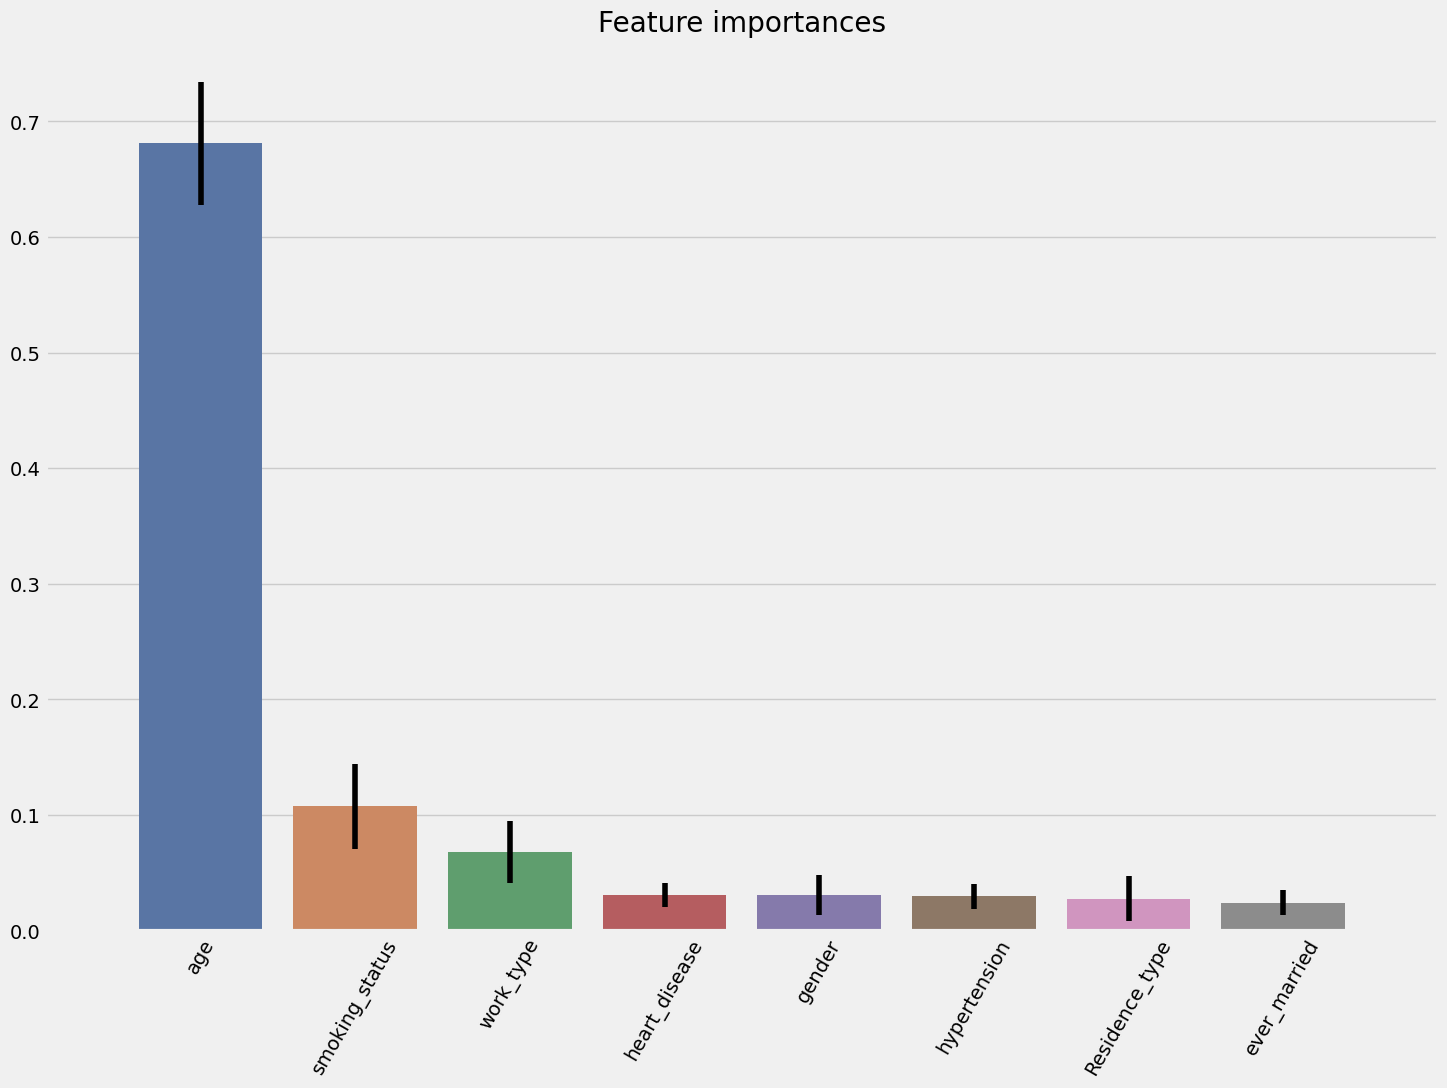

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Your data
X = en_df[features]
y = en_df['stroke']

# Create and fit the model
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

# Feature importances
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Set the size of the figure
plt.figure(figsize=(16, 11))  # Adjust the size as needed

# Plot the impurity-based feature importances of the forest
plt.title("Feature importances")
sns.barplot(x=np.array(features)[indices], y=importances[indices], palette="deep", yerr=std[indices])
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=60)
plt.xlim([-1, X.shape[1]])

# Show the plot
plt.show()


# ***********************************************

# PREPROCESSING

In [28]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [29]:
data.drop(data.loc[data['gender'] == 'Other'].index, inplace= True)
data.drop(['id'], axis=1, inplace=True)

## LabelEncoder

In [31]:
from sklearn.preprocessing import LabelEncoder

# Specify the columns to apply label encoding
columns_to_encode = ['gender',  'ever_married','work_type', 'Residence_type','smoking_status']

# Perform label encoding in a loop
for column in columns_to_encode:
    # Create a LabelEncoder object
    le = LabelEncoder()

    # Fit and transform the column data
    data[column] = le.fit_transform(data[column])

## fill missing values

In [32]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3 ,weights="uniform", missing_values=np.nan)
tab = imputer.fit_transform(data)
df_new = pd.DataFrame(tab, columns=data.columns)
df_new.head(10)
#df2.drop(['age_group'], axis=1, inplace=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,228.69,36.600000,1.0,1.0
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,37.966667,2.0,1.0
2,1.0,80.0,0.0,1.0,1.0,2.0,0.0,105.92,32.500000,2.0,1.0
3,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,34.400000,3.0,1.0
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.000000,2.0,1.0
5,1.0,81.0,0.0,0.0,1.0,2.0,1.0,186.21,29.000000,1.0,1.0
6,1.0,74.0,1.0,1.0,1.0,2.0,0.0,70.09,27.400000,2.0,1.0
7,0.0,69.0,0.0,0.0,0.0,2.0,1.0,94.39,22.800000,2.0,1.0
8,0.0,59.0,0.0,0.0,1.0,2.0,0.0,76.15,25.666667,0.0,1.0
9,0.0,78.0,0.0,0.0,1.0,2.0,1.0,58.57,24.200000,0.0,1.0


In [33]:
df_new.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [34]:
df_new.shape

(5109, 11)

## drop outliers

In [35]:
numerical_columns = list(df_new.loc[:,['age', 'avg_glucose_level', 'bmi']])
categorical_columns = list(df_new.loc[:,['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])

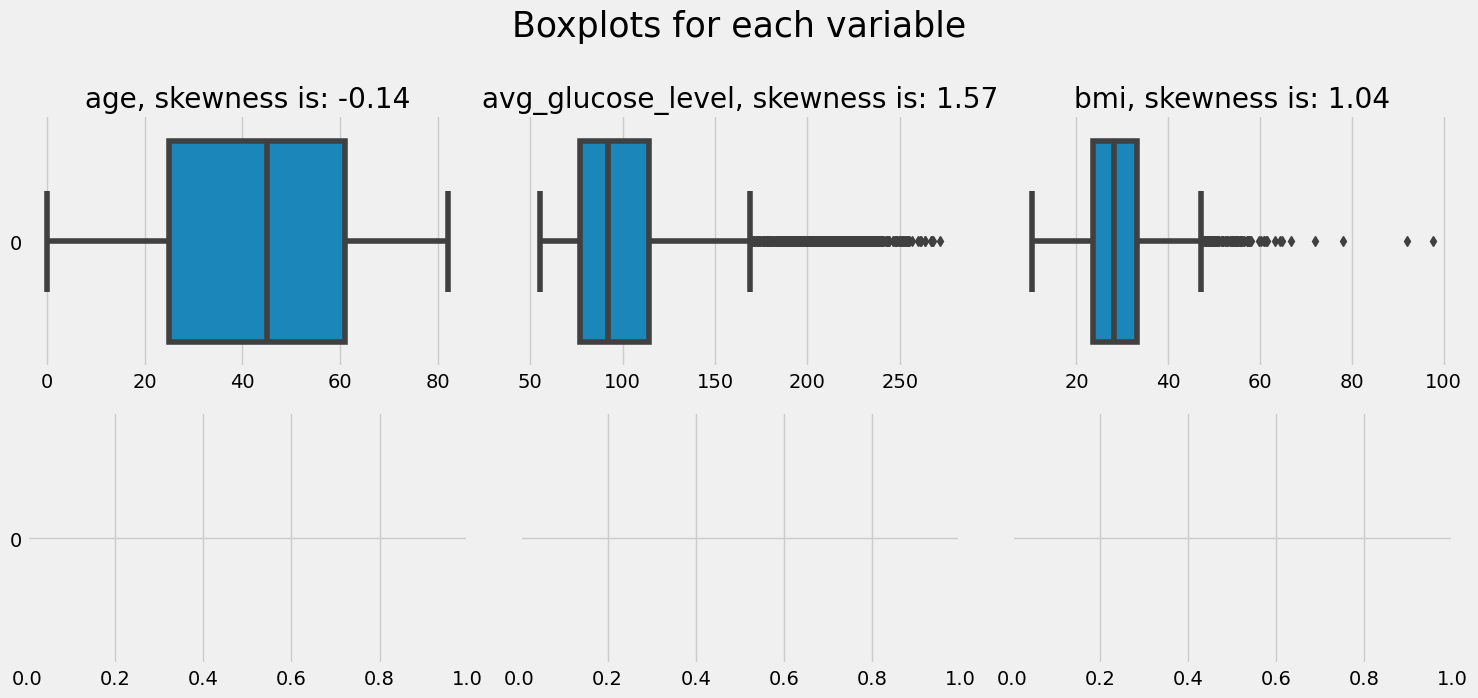

In [36]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(15,7))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df_new, columns_list=numerical_columns, rows=2, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

Inter Quartile Range (IQR)
Tukey’s (1977) technique is used to detect outliers in skewed or non bell-shaped data since it makes no distributional assumptions. However, Tukey’s method may not be appropriate for a small sample size. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal.

Procedure:

* Find the first quartile, Q1.
* Find the third quartile, Q3.
* Calculate the IQR. IQR = Q3-Q1.
* Define the normal data range with lower limit as Q1–1.5 IQR and upper limit as Q3+1.5 IQR.

In [37]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df_new[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df_new[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df_new[(df_new[column] < Q1 - outlier_step) | (df_new[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df_new[df_new[column] < Q1 - outlier_step]
    out2 = df_new[df_new[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [38]:
# detecting outliers
Outliers_IQR = IQR_method(df_new,1,numerical_columns)

# dropping outliers
df_new = df_new.drop(Outliers_IQR, axis = 0).reset_index(drop=True)
df_new.shape

Total number of deleted outliers is: 116


(5078, 11)

In [39]:
df_new.shape

(5078, 11)

### POWER TRANSFORM

In [41]:
from sklearn.preprocessing import PowerTransformer

# Specify the columns to apply the power transformation
columns_to_transform = [ 'avg_glucose_level', 'age','bmi']

# Create a PowerTransformer object
pt = PowerTransformer(method='yeo-johnson')

# Perform power transformation in a loop
for column in columns_to_transform:
    # Fit the PowerTransformer on the column data
    pt.fit(df_new[[column]])

    # Transform the column data
    transformed_data = pt.transform(df_new[[column]])

    # Assign the transformed values back to the DataFrame
    df_new[column] = transformed_data

In [42]:
df_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,1.060685,0.0,1.0,1.0,2.0,1.0,1.835361,1.060805,1.0,1.0
1,0.0,0.774362,0.0,0.0,1.0,3.0,0.0,1.683061,1.207422,2.0,1.0
2,1.0,1.695595,0.0,1.0,1.0,2.0,0.0,0.427044,0.589385,2.0,1.0
3,0.0,0.218599,0.0,0.0,1.0,2.0,1.0,1.441427,0.814099,3.0,1.0
4,0.0,1.646142,1.0,0.0,1.0,3.0,0.0,1.467811,-0.584339,2.0,1.0


## Machine Learning Model

In [43]:
# splitting the data into X and y
X = df_new.drop('stroke', axis=1)
y = df_new['stroke']
from sklearn.model_selection import train_test_split
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,1.060685,0.0,1.0,1.0,2.0,1.0,1.835361,1.060805,1.0
1,0.0,0.774362,0.0,0.0,1.0,3.0,0.0,1.683061,1.207422,2.0
2,1.0,1.695595,0.0,1.0,1.0,2.0,0.0,0.427044,0.589385,2.0
3,0.0,0.218599,0.0,0.0,1.0,2.0,1.0,1.441427,0.814099,3.0
4,0.0,1.646142,1.0,0.0,1.0,3.0,0.0,1.467811,-0.584339,2.0
...,...,...,...,...,...,...,...,...,...,...
5073,0.0,1.695595,1.0,0.0,1.0,2.0,1.0,-0.320684,-0.244513,2.0
5074,0.0,1.745139,0.0,0.0,1.0,3.0,1.0,0.844651,1.416965,2.0
5075,0.0,-0.389371,0.0,0.0,1.0,3.0,0.0,-0.354315,0.352663,2.0
5076,1.0,0.309377,0.0,0.0,1.0,2.0,0.0,1.394080,-0.338219,1.0


## balance target

In [44]:
from imblearn.combine import SMOTEENN
import numpy as np

# Assuming X and y are your feature matrix and target vector
smote_enn = SMOTEENN(random_state=42)

X_resampled, y_resampled = smote_enn.fit_resample(X, y)

print('Original Y Count: ', np.unique(y, return_counts=True))
print('Resampled Y Count: ', np.unique(y_resampled, return_counts=True))


Original Y Count:  (array([0., 1.]), array([4832,  246], dtype=int64))
Resampled Y Count:  (array([0., 1.]), array([3958, 4683], dtype=int64))


In [45]:


#from imblearn.over_sampling import RandomOverSampler
#import numpy as np

# Assuming X and y are your feature matrix and target vector
#ros = RandomOverSampler(sampling_strategy='minority')

#X_sample, y_sample = ros.fit_resample(X, y)
#print('Original Y Count: ', np.unique(y, return_counts=True))
#print('OverSample Y Count: ', np.unique(y_sample, return_counts=True))


In [46]:
#from imblearn.combine import SMOTEENN
#from imblearn.over_sampling import SMOTE
#sample = SMOTEENN()
#X_over,y_over = sample.fit_resample(X,y)

In [47]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=1)
X_os, y_os = os.fit_resample(X,y)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled , test_size=0.3, random_state=4)

In [49]:
y_train.value_counts()

1.0    3245
0.0    2803
Name: stroke, dtype: int64

In [50]:
class1_count = 3237
class0_count = 2816

total_samples = class1_count + class0_count

percentage_class1 = (class1_count / total_samples) * 100
percentage_class0 = (class0_count / total_samples) * 100

print(f"Percentage of Class 1: {percentage_class1:.2f}%")
print(f"Percentage of Class 0: {percentage_class0:.2f}%")


Percentage of Class 1: 53.48%
Percentage of Class 0: 46.52%


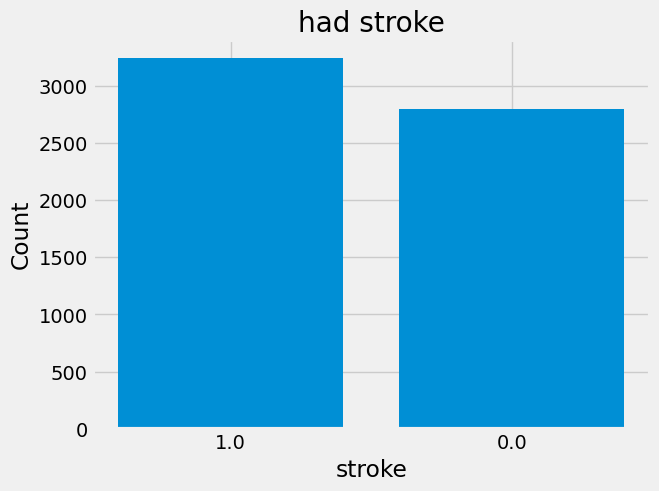

In [51]:
values = y_train.value_counts()
# تعداد مقادیر مختلف
num_values = len(values)
# نمایش نمودار
plt.bar(range(num_values), values)
plt.xlabel('stroke')
plt.ylabel('Count')
plt.title('had stroke')
plt.xticks(range(num_values), values.index)  # نام مقادیر بر روی محور x
plt.show()

## PCA

In [52]:
pca_3 = PCA(n_components=3)
pca_3.fit(X_train)
X_pca_3 = pca_3.transform(X_train)

In [53]:
pca_df_3 = pd.DataFrame(X_pca_3, columns=['feature1', 'feature2', 'feature3'])
pca_df_3 = pca_df_3.assign(target=y_train.values)

In [54]:
class1_features = pca_df_3[pca_df_3['target']==1]
class0_features = pca_df_3[pca_df_3['target']==0]

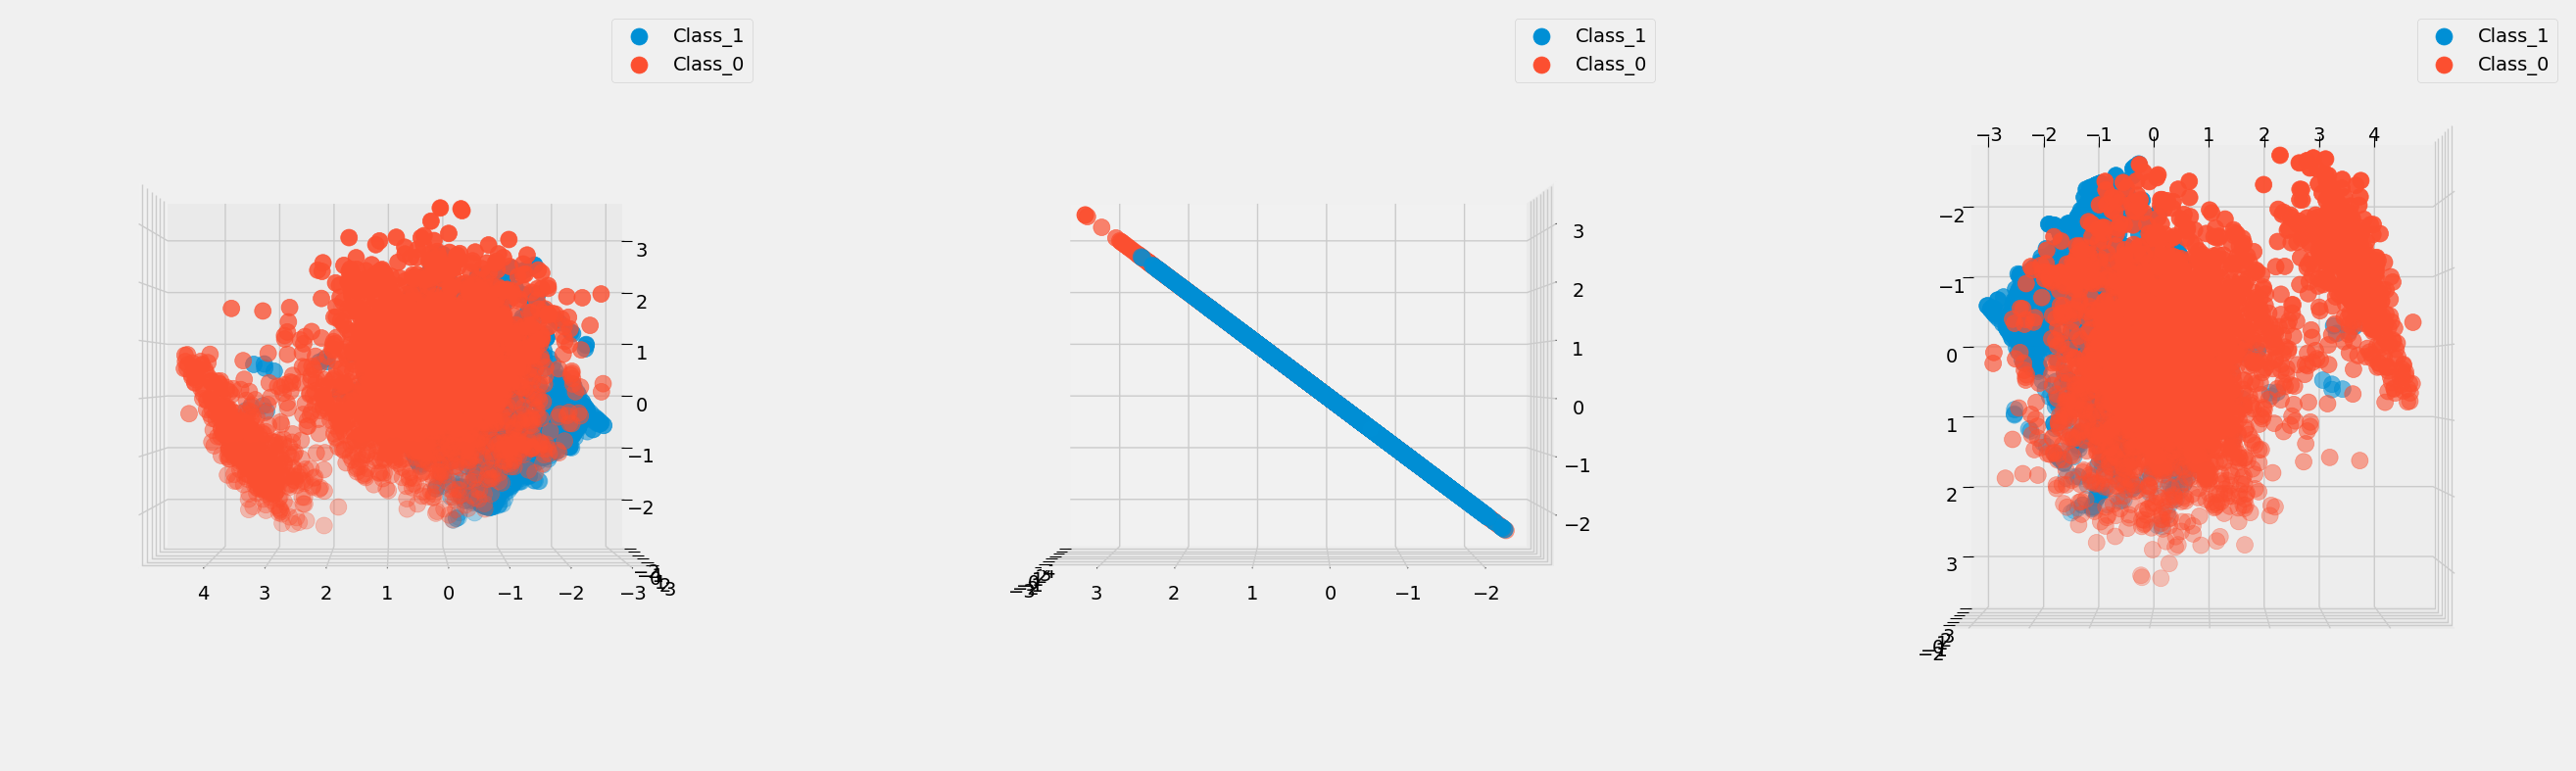

In [55]:
x_class1 = class1_features['feature1']
y_class1 = class1_features['feature2']
z_class1 = class1_features['feature2']

x_class0 = class0_features['feature1']
y_class0 = class0_features['feature2']
z_class0 = class0_features['feature2']


fig = plt.figure(figsize=(30, 30))


ax = fig.add_subplot(231, projection = '3d')
ax.scatter(x_class1, y_class1, z_class1, 'or', s=150, label='Class_1')
ax.scatter(x_class0, y_class0, z_class0, 'ob', s=150, label='Class_0')
ax.view_init(0, 90)
plt.legend()

ax = fig.add_subplot(232, projection = '3d')
ax.scatter(x_class1, y_class1, z_class1, 'or', s=150, label='Class_1')
ax.scatter(x_class0, y_class0, z_class0, 'ob', s=150, label='Class_0')
ax.view_init(0, 180)
plt.legend()

ax = fig.add_subplot(233, projection = '3d')
ax.scatter(x_class1, y_class1, z_class1, 'or', s=150, label='Class_1')
ax.scatter(x_class0, y_class0, z_class0, 'ob', s=150, label='Class_0')
ax.view_init(270, 270)
plt.legend()

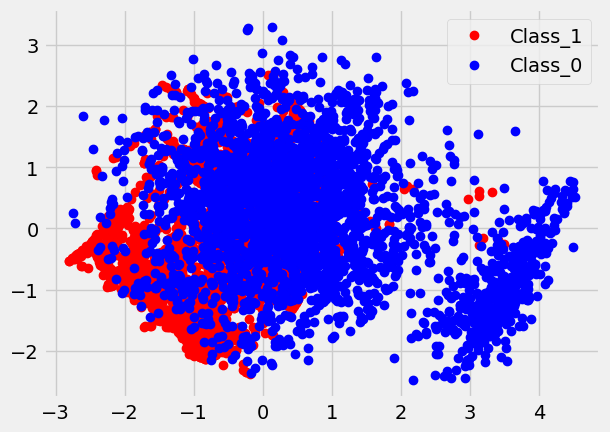

In [56]:
# Assuming X_train and y are your training features and labels, replace these with your actual data.
# Ensure that X_train and y have the same length.

pca_2 = PCA(n_components=2)
pca_2.fit(X_train)
X_pca_2 = pca_2.transform(X_train)

# Ensure that the lengths of X_train and y are the same
pca_df_2 = pd.DataFrame(X_pca_2, columns=['feature1', 'feature2'])
pca_df_2 = pca_df_2.assign(target=y_train.values)

class1_features_2 = pca_df_2[pca_df_2['target']==1]
class0_features_2 = pca_df_2[pca_df_2['target']==0]

plt.plot(class1_features_2['feature1'], class1_features_2['feature2'], 'or', label='Class_1')
plt.plot(class0_features_2['feature1'], class0_features_2['feature2'], 'ob', label='Class_0')

plt.grid(True)
plt.legend()

## KNN

### KNN with PCA

In [57]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create a pipeline with PCA, KNN, and GridSearchCV
pipeline = Pipeline([
    ('dimension_reduction', PCA()),
    ('classification', KNeighborsClassifier())
])

# Define the parameters for GridSearchCV
parameters = {
    'dimension_reduction__n_components': [1, 2, 3, 4, 5],  # You can adjust these values
    'classification__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'classification__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classification__p': [1, 2]
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=10)
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", grid_search.best_params_)
print("Accuracy: ", grid_search.best_score_)

Tuned hyperparameters (best parameters):  {'classification__algorithm': 'auto', 'classification__n_neighbors': 1, 'classification__p': 2, 'dimension_reduction__n_components': 5}
Accuracy:  0.9525452903508291


## KNN with LDA

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create a pipeline with LDA, KNN, and GridSearchCV
pipeline = Pipeline([
    ('dimension_reduction', LDA()),  # Use LDA instead of PCA
    ('classification', KNeighborsClassifier())
])

# Define the parameters for GridSearchCV
parameters = {
    'dimension_reduction__n_components': [1, 2],  # Adjust these values based on your needs
    'classification__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'classification__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classification__p': [1, 2]
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=10)
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", grid_search.best_params_)
print("Accuracy: ", grid_search.best_score_)

Tuned hyperparameters (best parameters):  {'classification__algorithm': 'auto', 'classification__n_neighbors': 9, 'classification__p': 1, 'dimension_reduction__n_components': 1}
Accuracy:  0.8197627387663511


## KNN with TSNE

In [56]:
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split



# Step 1: Perform t-SNE
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)

# Step 2: Apply GridSearchCV on KNN
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

grid_search = GridSearchCV(knn, parameters, cv=10)
grid_search.fit(X_train_tsne, y_train)

# Print the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", grid_search.best_params_)
print("Accuracy: ", grid_search.best_score_)


Tuned hyperparameters (best parameters):  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}
Accuracy:  0.986426851294401


# Logistic Regression with PCA

In [57]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split



# Create a pipeline with PCA, Logistic Regression, and GridSearchCV
pipeline = Pipeline([
    ('dimension_reduction', PCA()),
    ('classification', LogisticRegression())
])

# Define the parameters for GridSearchCV
parameters = {
    'dimension_reduction__n_components': [1, 2, 3, 4, 5],  # You can adjust these values
    'classification__C': [0.01, 0.1, 1],
    'classification__penalty': ['l2'],
    'classification__solver': ['lbfgs']
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=10)
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", grid_search.best_params_)
print("Accuracy: ", grid_search.best_score_)


Tuned hyperparameters (best parameters):  {'classification__C': 0.1, 'classification__penalty': 'l2', 'classification__solver': 'lbfgs', 'dimension_reduction__n_components': 5}
Accuracy:  0.8300240818783864


## LogisticRegression with LDA

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Create a pipeline with LDA, Logistic Regression, and GridSearchCV
pipeline = Pipeline([
    ('dimension_reduction', LinearDiscriminantAnalysis()),
    ('classification', LogisticRegression())
])

# Define the parameters for GridSearchCV
parameters = {
    'dimension_reduction__n_components': [1, 2, 3, 4, 5],  # You can adjust these values
    'classification__C': [0.01, 0.1, 1],
    'classification__penalty': ['l2'],
    'classification__solver': ['lbfgs']
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=10)
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", grid_search.best_params_)
print("Accuracy: ", grid_search.best_score_)


Tuned hyperparameters (best parameters):  {'classification__C': 0.01, 'classification__penalty': 'l2', 'classification__solver': 'lbfgs', 'dimension_reduction__n_components': 1}
Accuracy:  0.8298579716490613


## LogisticRegression with TSNE

In [59]:
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline



# Step 1: Perform t-SNE
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)

# Step 2: Apply GridSearchCV on Logistic Regression
lr = LogisticRegression()
parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid_search = GridSearchCV(lr, parameters, cv=10)
grid_search.fit(X_train_tsne, y_train)

# Print the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", grid_search.best_params_)
print("Accuracy: ", grid_search.best_score_)

Tuned hyperparameters (best parameters):  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy:  0.5450257238246401


## SVM with PCA

In [60]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split



# Create a pipeline with PCA, SVM, and GridSearchCV
pipeline = Pipeline([
    ('dimension_reduction', PCA()),
    ('classification', SVC())
])

# Define the parameters for GridSearchCV
parameters = {
    'dimension_reduction__n_components': [1, 2, 3, 4, 5],  # You can adjust these values
    'classification__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'classification__C': [0.5, 1, 1.5]
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=10)
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", grid_search.best_params_)
print("Accuracy: ", grid_search.best_score_)

Tuned hyperparameters (best parameters):  {'classification__C': 1.5, 'classification__kernel': 'rbf', 'dimension_reduction__n_components': 5}
Accuracy:  0.8661039351978544


## SVM WITH LDA

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split



# Create a pipeline with LDA, SVM, and GridSearchCV
pipeline = Pipeline([
    ('dimension_reduction', LDA()),  # Use LDA instead of PCA
    ('classification', SVC())
])

# Define the parameters for GridSearchCV
parameters = {
    'dimension_reduction__n_components': [1, 2, 3, 4, 5],  # You can adjust these values
    'classification__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'classification__C': [0.5, 1, 1.5]
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=10)
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", grid_search.best_params_)
print("Accuracy: ", grid_search.best_score_)

Tuned hyperparameters (best parameters):  {'classification__C': 0.5, 'classification__kernel': 'linear', 'dimension_reduction__n_components': 1}
Accuracy:  0.8273758962289968



## Decision Trees

In [62]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [63]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train , y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [64]:
print('tuned hpyerparameters :(best parameters) ', tree_cv.best_params_)
print('accuracy :', tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.9344565157900497


## DT with PCA

In [65]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Create a pipeline with PCA, Decision Trees, and GridSearchCV
pipeline = Pipeline([
    ('dimension_reduction', PCA()),
    ('classification', DecisionTreeClassifier())  # Change to DecisionTreeClassifier
])

# Define the parameters for GridSearchCV
parameters = {
    'dimension_reduction__n_components': [1, 2, 3, 4, 5],  # You can adjust these values
    'classification__criterion': ['gini', 'entropy'],
    'classification__splitter': ['best', 'random'],
    'classification__max_depth': [2 * n for n in range(1, 10)],
    'classification__max_features': ['auto', 'sqrt'],
    'classification__min_samples_leaf': [1, 2, 4],
    'classification__min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=10)
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", grid_search.best_params_)
print("Accuracy: ", grid_search.best_score_)

Tuned hyperparameters (best parameters):  {'classification__criterion': 'gini', 'classification__max_depth': 16, 'classification__max_features': 'sqrt', 'classification__min_samples_leaf': 1, 'classification__min_samples_split': 2, 'classification__splitter': 'best', 'dimension_reduction__n_components': 5}
Accuracy:  0.9045030376005693


# DT with LDA

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Create a pipeline with LDA, Decision Trees, and GridSearchCV
pipeline = Pipeline([
    ('dimension_reduction', LinearDiscriminantAnalysis()),  # Change to LinearDiscriminantAnalysis
    ('classification', DecisionTreeClassifier())
])

# Define the parameters for GridSearchCV
parameters = {
    'dimension_reduction__n_components': [1, 2, 3, 4, 5],  # You can adjust these values
    'classification__criterion': ['gini', 'entropy'],
    'classification__splitter': ['best', 'random'],
    'classification__max_depth': [2 * n for n in range(1, 10)],
    'classification__max_features': ['auto', 'sqrt'],
    'classification__min_samples_leaf': [1, 2, 4],
    'classification__min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=10)
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", grid_search.best_params_)
print("Accuracy: ", grid_search.best_score_)

Tuned hyperparameters (best parameters):  {'classification__criterion': 'gini', 'classification__max_depth': 2, 'classification__max_features': 'auto', 'classification__min_samples_leaf': 1, 'classification__min_samples_split': 2, 'classification__splitter': 'best', 'dimension_reduction__n_components': 1}
Accuracy:  0.8300235345629687


# DT with TSNE

In [67]:
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Apply t-SNE on the training data
tsne = TSNE(perplexity=5)  # You can adjust perplexity
X_train_tsne = tsne.fit_transform(X_train)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_tsne, y_train, test_size=0.2, random_state=42)

# Create a Decision Tree classifier and set its parameters
classifier = DecisionTreeClassifier()

# Define the parameters for GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(classifier, parameters, cv=10)
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", grid_search.best_params_)
print("Accuracy: ", grid_search.best_score_)

Tuned hyperparameters (best parameters):  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy:  0.9623449343805074


## RandomForestClassifier

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd





# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the parameters for GridSearchCV
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform GridSearchCV
grid_search = GridSearchCV(rf_classifier, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", grid_search.best_params_)
print("Best Cross-validated Accuracy: ", grid_search.best_score_)

# Evaluate the model on the test set
best_rf_model = grid_search.best_estimator_
test_accuracy = best_rf_model.score(X_test, y_test)
print("Test Set Accuracy: ", test_accuracy)


Tuned hyperparameters (best parameters):  {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validated Accuracy:  0.9822059645313995
Test Set Accuracy:  0.9801488833746899


## Model Selection

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve,  average_precision_score
from sklearn.model_selection import cross_val_score

In [71]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
[[316 254]
 [173 466]]
Accuracy Score:  0.6468155500413565

K-Fold Validation Mean Accuracy: 62.80 %

Standard Deviation: 1.88 %

ROC AUC Score: 0.64

Precision: 0.65

Recall: 0.73

F1: 0.69
-----------------------------------

SVM :
[[463 107]
 [120 519]]
Accuracy Score:  0.8122415219189413

K-Fold Validation Mean Accuracy: 83.43 %

Standard Deviation: 1.16 %

ROC AUC Score: 0.81

Precision: 0.83

Recall: 0.81

F1: 0.82
-----------------------------------

KNeighbors :
[[532  38]
 [  1 638]]
Accuracy Score:  0.967741935483871

K-Fold Validation Mean Accuracy: 97.77 %

Standard Deviation: 0.48 %

ROC AUC Score: 0.97

Precision: 0.94

Recall: 1.00

F1: 0.97
-----------------------------------

GaussianNB :
[[360 210]
 [ 99 540]]
Accuracy Score:  0.7444168734491315

K-Fold Validation Mean Accuracy: 74.59 %

Standard Deviation: 1.29 %

ROC AUC Score: 0.74

Precision: 0.72

Recall: 0.85

F1: 0.78
-----------------------------------

BernoulliNB :
[[366 204]
 [213 426]

In [72]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [73]:
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [74]:
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
6,Random Forest,98.014888,98.469021,0.435376,0.979516,0.972350,0.990610,0.981395
7,XGBoost,96.856907,97.765729,0.617879,0.967803,0.960184,0.981221,0.970588
2,KNeighbors,96.774194,97.765515,0.477835,0.965884,0.943787,0.998435,0.970342
5,Decision Tree,96.608768,97.269262,0.713442,0.965172,0.955793,0.981221,0.968340
1,SVM,81.224152,83.426972,1.156885,0.812244,0.829073,0.812207,0.820553
3,GaussianNB,74.441687,74.591440,1.286094,0.738325,0.720000,0.845070,0.777538
4,BernoulliNB,65.508685,63.107900,1.442596,0.654386,0.676190,0.666667,0.671395
0,Logistic Regreesion,64.681555,62.798410,1.878794,0.641825,0.647222,0.729264,0.685798


## Tuning the Models 

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
              (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [77]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 62.80%
Best Parameters :  {'C': 0.25, 'random_state': 0}

----------------

KNeighborsClassifier():
Best Accuracy : 97.77%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 5}

----------------

SVC():
Best Accuracy : 83.43%
Best Parameters :  {'C': 1, 'kernel': 'rbf', 'random_state': 0}

----------------

GaussianNB():
Best Accuracy : 74.59%
Best Parameters :  {'var_smoothing': 1e-09}

----------------

BernoulliNB():
Best Accuracy : 63.11%
Best Parameters :  {'alpha': 0.25}

----------------

DecisionTreeClassifier():
Best Accuracy : 97.29%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 98.49%
Best Parameters :  {'criterion': 'gini', 'n_estimators': 200, 'random_state': 0}

----------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, ea

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       570
         1.0       0.97      0.99      0.98       639

    accuracy                           0.98      1209
   macro avg       0.98      0.98      0.98      1209
weighted avg       0.98      0.98      0.98      1209

ROC AUC score: 0.9882986025313675
Accuracy Score:  0.9801488833746899


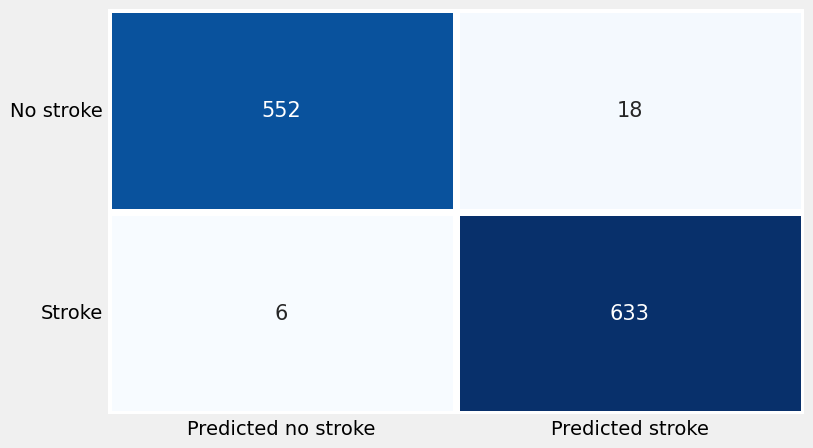

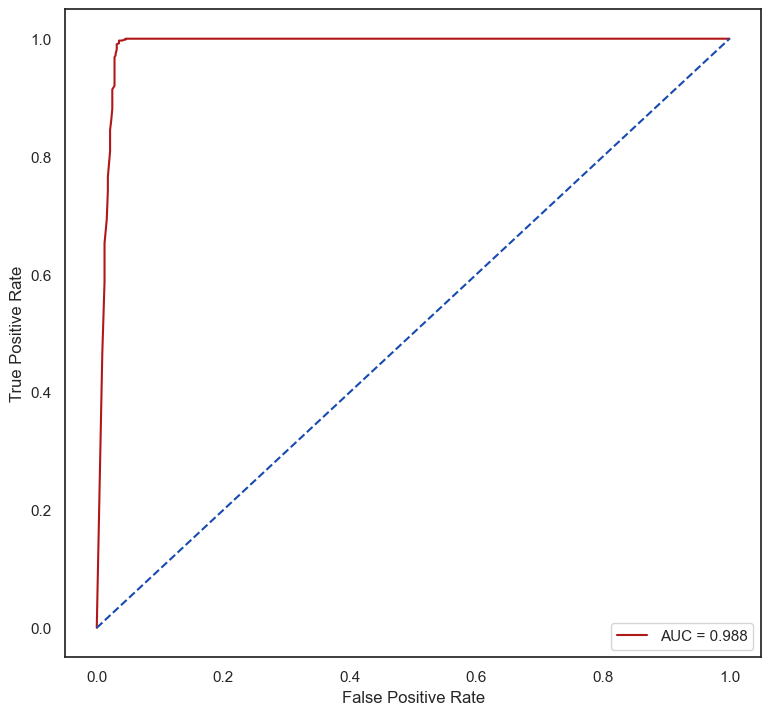

In [78]:
#Fitting RandomForest Model
classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 100, random_state= 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# XGBOOST

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94       561
         1.0       0.94      0.97      0.95       650

    accuracy                           0.95      1211
   macro avg       0.95      0.95      0.95      1211
weighted avg       0.95      0.95      0.95      1211

ROC AUC score: 0.9799629781982724
Accuracy Score:  0.9471511147811725


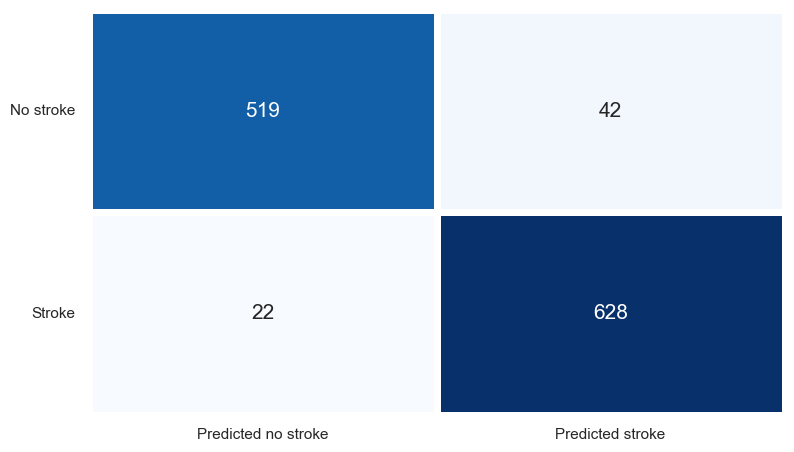

Text(0.5, 0, 'False Positive Rate')

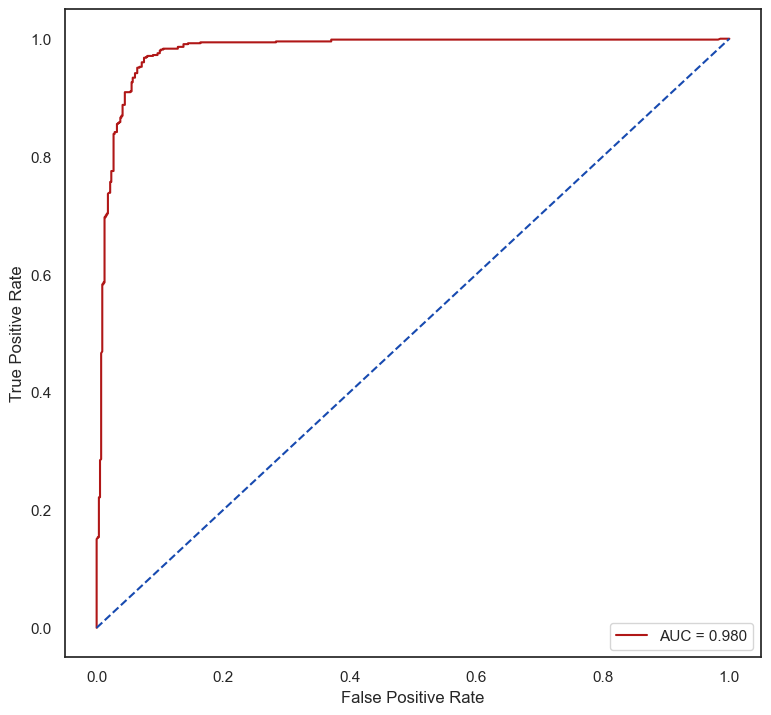

In [401]:
#Fitting XGBClassifier Model
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Keras ANN

In [55]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [56]:
# MLP for Pima Indians Dataset with 10-fold cross validation via sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as n

In [57]:
from keras.regularizers import l2

## Building the ANN 

In [58]:
# Builing the function
def ann_classifier():
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    tf.keras.layers.Dropout(0.6)
    ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))
    ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
    return ann

In [59]:
# Passing values to KerasClassifier 
ann = KerasClassifier(build_fn = ann_classifier, batch_size = 25, epochs = 50)

## Evaluating the ANN (Cross Validation) 

In [60]:
X_train.shape

(6053, 10)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier

# Define your Keras model function
def create_model():
    model = Sequential()
    model.add(Dense(400, activation='relu', input_shape=(10,)))
    model.add(Dropout(0.5))
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Create a KerasClassifier for use with scikit-learn
ann = KerasClassifier(build_fn=create_model, epochs=50, batch_size=25, verbose=0)

# Assuming X_train and y_train are your training data
# Use cross_val_score for cross-validation
accuracies = cross_val_score(estimator=ann, X=X_train, y=y_train, cv=StratifiedKFold(n_splits=5))

# Display the cross-validation scores
print("Cross-Validation Scores:", accuracies)
print("Mean Accuracy: {:.2f}%".format(accuracies.mean() * 100))





Cross-Validation Scores: [0.96366639 0.96284063 0.95375723 0.96033058 0.97272727]
Mean Accuracy: 96.27%


In [62]:
# Builing the function
def ann_classifier(optimizer = 'adam'):
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    tf.keras.layers.Dropout(0.6)
    ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))
    ann.compile(optimizer= optimizer, loss= 'binary_crossentropy', metrics= ['accuracy'])

In [63]:
# Passing values to KerasClassifier 
ann = KerasClassifier(build_fn = ann_classifier, batch_size = 32, epochs = 50)

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import GridSearchCV

# Define the function to create the Keras model
def ann_classifier(optimizer='adam'):
    model = Sequential()
    # Add your layers to the model
    model.add(Dense(units=8, activation='relu', input_dim=10))
    # Add more layers as needed
    # ...

    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Create the KerasClassifier
ann = KerasClassifier(build_fn=ann_classifier, epochs=50, batch_size=32, verbose=0)

# Define the parameters for grid search
parameters = {'batch_size': [25, 32],
              'epochs': [50, 100, 150],
              'optimizer': ['adam', 'rmsprop']}

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=ann, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=KerasClassifier(batch_size=32, build_fn=<function ann_classifier at 0x000001BD95097B50>, epochs=50, verbose=0),
             n_jobs=-1,
             param_grid={'batch_size': [25, 32], 'epochs': [50, 100, 150],
                         'optimizer': ['adam', 'rmsprop']},
             scoring='accuracy')

In [65]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: nan %
Best Parameters: {'batch_size': 25, 'epochs': 50, 'optimizer': 'adam'}


In [66]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'batch_size': 25, 'epochs': 50, 'optimizer': 'adam'}


## MLP NN Classifier

In [67]:
from sklearn.neural_network import MLPClassifier
print("Number of features in X_train:", X_train.shape[1])
print("Number of features in X_test:", X_test.shape[1])

# Rest of your code
mlp = MLPClassifier(hidden_layer_sizes=(300, 300, 300), max_iter=1000, alpha=0.00001,
                    solver='adam', verbose=10, random_state=21)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

mlp_score = mlp.score(X_train, y_train)
mlp_test = mlp.score(X_test, y_test)

y_pred = mlp.predict(X_test)

# Rest of your evaluation code
# Rest of your evaluation code
cm = confusion_matrix(y_test,y_pred)
print('Training Score',mlp_score)
print('Testing Score \n',mlp_test)
print(cm)

Number of features in X_train: 10
Number of features in X_test: 10
Iteration 1, loss = 0.41277461
Iteration 2, loss = 0.33332920
Iteration 3, loss = 0.30443082
Iteration 4, loss = 0.28524208
Iteration 5, loss = 0.26321108
Iteration 6, loss = 0.23468561
Iteration 7, loss = 0.19597716
Iteration 8, loss = 0.17678142
Iteration 9, loss = 0.16133611
Iteration 10, loss = 0.13505621
Iteration 11, loss = 0.12848648
Iteration 12, loss = 0.11585389
Iteration 13, loss = 0.09145900
Iteration 14, loss = 0.07799781
Iteration 15, loss = 0.06754330
Iteration 16, loss = 0.07476017
Iteration 17, loss = 0.05728574
Iteration 18, loss = 0.04920857
Iteration 19, loss = 0.04319811
Iteration 20, loss = 0.03587404
Iteration 21, loss = 0.03994726
Iteration 22, loss = 0.04207178
Iteration 23, loss = 0.02914943
Iteration 24, loss = 0.02461107
Iteration 25, loss = 0.02448949
Iteration 26, loss = 0.02220521
Iteration 27, loss = 0.02673719
Iteration 28, loss = 0.01616168
Iteration 29, loss = 0.01295661
Iteration 30, 

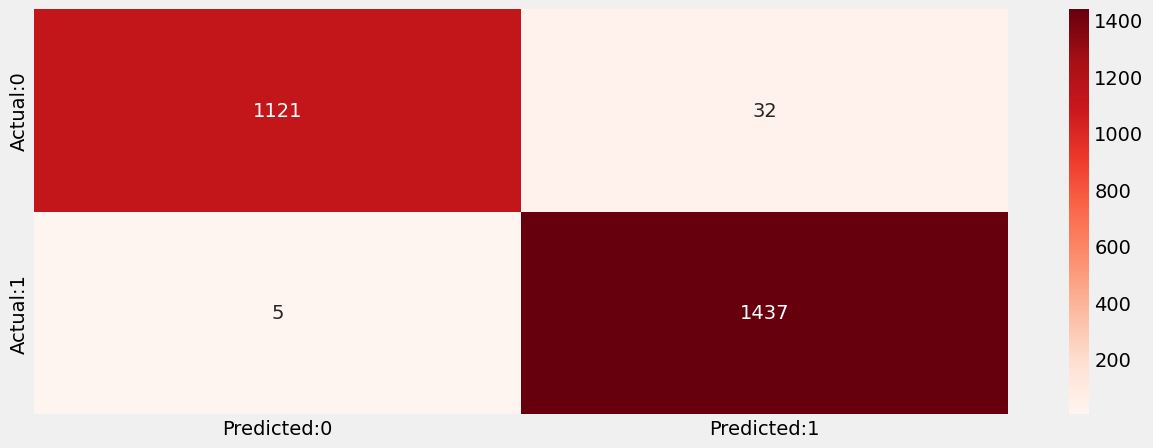

In [68]:
plt.figure(figsize=(14,5))
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Reds");

In [69]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [70]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n')

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =        0.9857418111753372 
 The Missclassification = 1-Accuracy =                   0.014258188824662787 
 Sensitivity or True Positive Rate = TP/(TP+FN) =        0.9965325936199723 
 Specificity or True Negative Rate = TN/(TN+FP) =        0.9722463139635733 



## neural network

In [71]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
    tf.keras.layers.Dropout(0.5),  # یک لایه Dropout برای کاهش بعد
])
# استفاده از تابع منسوخ شده
# tf.get_default_graph()
# استفاده از تابع جدید
tf.compat.v1.get_default_graph()

In [72]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                352       
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 8)                 136       
                                                                 
 dense_24 (Dense)            (None, 4)                 36        
                                                                 
 dense_25 (Dense)            (None, 1)                 5         
                                                                 
 dropout_10 (Dropout)        (None, 1)                 0         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4

In [73]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
190/190 [==============================] - 1s 3ms/step - loss: 4.4978 - accuracy: 0.5477 - val_loss: 0.7099 - val_accuracy: 0.4443
Epoch 2/10
190/190 [==============================] - 0s 1ms/step - loss: 4.3895 - accuracy: 0.6367 - val_loss: 0.6241 - val_accuracy: 0.4443
Epoch 3/10
190/190 [==============================] - 0s 1ms/step - loss: 4.0987 - accuracy: 0.6653 - val_loss: 0.6068 - val_accuracy: 0.4443
Epoch 4/10
190/190 [==============================] - 0s 1ms/step - loss: 4.2142 - accuracy: 0.6605 - val_loss: 0.6022 - val_accuracy: 0.4563
Epoch 5/10
190/190 [==============================] - 0s 2ms/step - loss: 4.3577 - accuracy: 0.6552 - val_loss: 0.6223 - val_accuracy: 0.4509
Epoch 6/10
190/190 [==============================] - 0s 1ms/step - loss: 4.2828 - accuracy: 0.6617 - val_loss: 0.5932 - val_accuracy: 0.4678
Epoch 7/10
190/190 [==============================] - 0s 1ms/step - loss: 4.3039 - accuracy: 0.6580 - val_loss: 0.5728 - val_accuracy: 0.4960
Epoch 

In [75]:
eval_result = model.evaluate(X_test, y_test)
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])


82/82 [==============================] - 0s 865us/step - loss: 0.5952 - accuracy: 0.4474
Test Loss: 0.5952436923980713
Test Accuracy: 0.447398841381073


In [76]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [77]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 32)                352       
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 4)                 36        
                                                                 
 dense_30 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [79]:
model.fit(X_train, y_train, epochs=60, batch_size=60, verbose=1)

Epoch 1/60
101/101 [==============================] - 1s 1ms/step - loss: 0.5814 - accuracy: 0.7210
Epoch 2/60
101/101 [==============================] - 0s 967us/step - loss: 0.4781 - accuracy: 0.8381
Epoch 3/60
101/101 [==============================] - 0s 997us/step - loss: 0.3719 - accuracy: 0.8551
Epoch 4/60
101/101 [==============================] - 0s 1ms/step - loss: 0.3322 - accuracy: 0.8621
Epoch 5/60
101/101 [==============================] - 0s 997us/step - loss: 0.3229 - accuracy: 0.8667
Epoch 6/60
101/101 [==============================] - 0s 1ms/step - loss: 0.3125 - accuracy: 0.8733
Epoch 7/60
101/101 [==============================] - 0s 1ms/step - loss: 0.3030 - accuracy: 0.8748
Epoch 8/60
101/101 [==============================] - 0s 1ms/step - loss: 0.2926 - accuracy: 0.8799
Epoch 9/60
101/101 [==============================] - 0s 989us/step - loss: 0.2880 - accuracy: 0.8824
Epoch 10/60
101/101 [==============================] - 0s 957us/step - loss: 0.2770 - accura

In [80]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [81]:
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.155039444565773
Test Accuracy: 0.9483622312545776


In [82]:
from tensorflow.keras.layers import Dropout

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # افزودن Dropout با نرخ 0.5
    tf.keras.layers.Dense(16, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(8, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=60, batch_size=60, verbose=1)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/60
101/101 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.5229
Epoch 2/60
101/101 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.5331
Epoch 3/60
101/101 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.5951
Epoch 4/60
101/101 [==============================] - 0s 1ms/step - loss: 0.6329 - accuracy: 0.6351
Epoch 5/60
101/101 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.6911
Epoch 6/60
101/101 [==============================] - 0s 1ms/step - loss: 0.5498 - accuracy: 0.7284
Epoch 7/60
101/101 [==============================] - 0s 1ms/step - loss: 0.5186 - accuracy: 0.7616
Epoch 8/60
101/101 [==============================] - 0s 1ms/step - loss: 0.5043 - accuracy: 0.7652
Epoch 9/60
101/101 [==============================] - 0s 1ms/step - loss: 0.4812 - accuracy: 0.7836
Epoch 10/60
101/101 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7880

In [83]:
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.31328701972961426
Test Accuracy: 0.8832370042800903


In [84]:
from tensorflow.keras.layers import BatchNormalization

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # افزودن Batch Normalization
    tf.keras.layers.Dense(16, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dense(8, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=60, batch_size=60, verbose=1)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/60
101/101 [==============================] - 2s 1ms/step - loss: 0.5521 - accuracy: 0.7165
Epoch 2/60
101/101 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8229
Epoch 3/60
101/101 [==============================] - 0s 1ms/step - loss: 0.3418 - accuracy: 0.8516
Epoch 4/60
101/101 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.8660
Epoch 5/60
101/101 [==============================] - 0s 1ms/step - loss: 0.2961 - accuracy: 0.8725
Epoch 6/60
101/101 [==============================] - 0s 1ms/step - loss: 0.2762 - accuracy: 0.8817
Epoch 7/60
101/101 [==============================] - 0s 1ms/step - loss: 0.2693 - accuracy: 0.8896
Epoch 8/60
101/101 [==============================] - 0s 1ms/step - loss: 0.2608 - accuracy: 0.8857
Epoch 9/60
101/101 [==============================] - 0s 1ms/step - loss: 0.2476 - accuracy: 0.8928
Epoch 10/60
101/101 [==============================] - 0s 1ms/step - loss: 0.2467 - accuracy: 0.8888

In [85]:
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.1463579684495926
Test Accuracy: 0.9518304467201233


In [86]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# تابع برای ساخت مدل
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ساخت یک wrapper از مدل برای استفاده در GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=60, batch_size=60, verbose=0)

# تعریف مجموعه پارامترها
param_grid = {
    'batch_size': [30, 40, 50],
    'epochs': [50, 60, 70],
    'optimizer': ['adam', 'rmsprop']
}

# انجام گرید سرچ
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_result = grid.fit(X_train, y_train)

# چاپ بهترین پارامترها و دقت
print("Best parameters: ", grid_result.best_params_)
print("Best accuracy: ", grid_result.best_score_)


Best parameters:  {'batch_size': 40, 'epochs': 70, 'optimizer': 'rmsprop'}
Best accuracy:  0.9456447909976958


In [87]:
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.1463579684495926
Test Accuracy: 0.9518304467201233


## Nuural network

In [88]:
print(X_train.shape[0], X_train.shape[1])

6053 10


In [89]:
model = Sequential()
model.add(Dense(400,activation='relu', input_shape=(10,)))
model.add(Dropout(0.5))
model.add(Dense(400,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [90]:
model.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_316 (Dense)           (None, 400)               4400      
                                                                 
 dropout_14 (Dropout)        (None, 400)               0         
                                                                 
 dense_317 (Dense)           (None, 400)               160400    
                                                                 
 dropout_15 (Dropout)        (None, 400)               0         
                                                                 
 dense_318 (Dense)           (None, 128)               51328     
                                                                 
 dense_319 (Dense)           (None, 1)                 129       
                                                                 
Total params: 216257 (844.75 KB)
Trainable params: 21

In [91]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [92]:
history = model.fit(X_train, y_train, 
                            batch_size=512, 
                            epochs=400,
                            validation_data=(X_test, y_test))

Epoch 1/400
12/12 [==============================] - 1s 19ms/step - loss: 0.5427 - accuracy: 0.7198 - val_loss: 0.4206 - val_accuracy: 0.8119
Epoch 2/400
12/12 [==============================] - 0s 9ms/step - loss: 0.3948 - accuracy: 0.8224 - val_loss: 0.3727 - val_accuracy: 0.8374
Epoch 3/400
12/12 [==============================] - 0s 8ms/step - loss: 0.3722 - accuracy: 0.8411 - val_loss: 0.3574 - val_accuracy: 0.8439
Epoch 4/400
12/12 [==============================] - 0s 9ms/step - loss: 0.3564 - accuracy: 0.8447 - val_loss: 0.3465 - val_accuracy: 0.8478
Epoch 5/400
12/12 [==============================] - 0s 8ms/step - loss: 0.3464 - accuracy: 0.8495 - val_loss: 0.3353 - val_accuracy: 0.8551
Epoch 6/400
12/12 [==============================] - 0s 8ms/step - loss: 0.3393 - accuracy: 0.8518 - val_loss: 0.3268 - val_accuracy: 0.8586
Epoch 7/400
12/12 [==============================] - 0s 8ms/step - loss: 0.3305 - accuracy: 0.8563 - val_loss: 0.3226 - val_accuracy: 0.8566
Epoch 8/400


Epoch 59/400
12/12 [==============================] - 0s 9ms/step - loss: 0.1238 - accuracy: 0.9556 - val_loss: 0.1282 - val_accuracy: 0.9534
Epoch 60/400
12/12 [==============================] - 0s 8ms/step - loss: 0.1240 - accuracy: 0.9534 - val_loss: 0.1116 - val_accuracy: 0.9638
Epoch 61/400
12/12 [==============================] - 0s 8ms/step - loss: 0.1160 - accuracy: 0.9608 - val_loss: 0.1125 - val_accuracy: 0.9615
Epoch 62/400
12/12 [==============================] - 0s 8ms/step - loss: 0.1122 - accuracy: 0.9577 - val_loss: 0.1027 - val_accuracy: 0.9672
Epoch 63/400
12/12 [==============================] - 0s 8ms/step - loss: 0.1172 - accuracy: 0.9559 - val_loss: 0.0975 - val_accuracy: 0.9723
Epoch 64/400
12/12 [==============================] - 0s 8ms/step - loss: 0.1104 - accuracy: 0.9615 - val_loss: 0.0989 - val_accuracy: 0.9672
Epoch 65/400
12/12 [==============================] - 0s 8ms/step - loss: 0.1129 - accuracy: 0.9592 - val_loss: 0.1001 - val_accuracy: 0.9688
Epoch 

12/12 [==============================] - 0s 8ms/step - loss: 0.0461 - accuracy: 0.9845 - val_loss: 0.0588 - val_accuracy: 0.9827
Epoch 174/400
12/12 [==============================] - 0s 9ms/step - loss: 0.0448 - accuracy: 0.9848 - val_loss: 0.0581 - val_accuracy: 0.9827
Epoch 175/400
12/12 [==============================] - 0s 10ms/step - loss: 0.0422 - accuracy: 0.9845 - val_loss: 0.0532 - val_accuracy: 0.9857
Epoch 176/400
12/12 [==============================] - 0s 8ms/step - loss: 0.0415 - accuracy: 0.9848 - val_loss: 0.0517 - val_accuracy: 0.9861
Epoch 177/400
12/12 [==============================] - 0s 9ms/step - loss: 0.0394 - accuracy: 0.9883 - val_loss: 0.0545 - val_accuracy: 0.9861
Epoch 178/400
12/12 [==============================] - 0s 8ms/step - loss: 0.0438 - accuracy: 0.9855 - val_loss: 0.0579 - val_accuracy: 0.9846
Epoch 179/400
12/12 [==============================] - 0s 10ms/step - loss: 0.0389 - accuracy: 0.9878 - val_loss: 0.0586 - val_accuracy: 0.9846
Epoch 180/4

12/12 [==============================] - 0s 9ms/step - loss: 0.0285 - accuracy: 0.9914 - val_loss: 0.0576 - val_accuracy: 0.9857
Epoch 288/400
12/12 [==============================] - 0s 8ms/step - loss: 0.0363 - accuracy: 0.9891 - val_loss: 0.0601 - val_accuracy: 0.9854
Epoch 289/400
12/12 [==============================] - 0s 8ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0522 - val_accuracy: 0.9865
Epoch 290/400
12/12 [==============================] - 0s 8ms/step - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.0571 - val_accuracy: 0.9850
Epoch 291/400
12/12 [==============================] - 0s 8ms/step - loss: 0.0254 - accuracy: 0.9921 - val_loss: 0.0573 - val_accuracy: 0.9854
Epoch 292/400
12/12 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.9921 - val_loss: 0.0523 - val_accuracy: 0.9877
Epoch 293/400
12/12 [==============================] - 0s 9ms/step - loss: 0.0244 - accuracy: 0.9911 - val_loss: 0.0581 - val_accuracy: 0.9850
Epoch 294/400

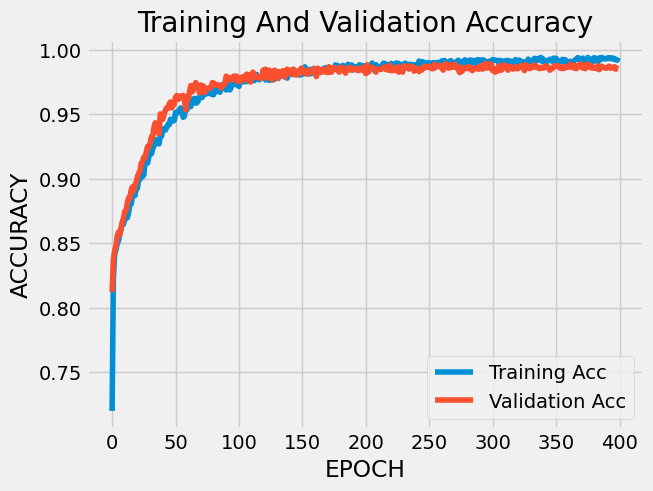

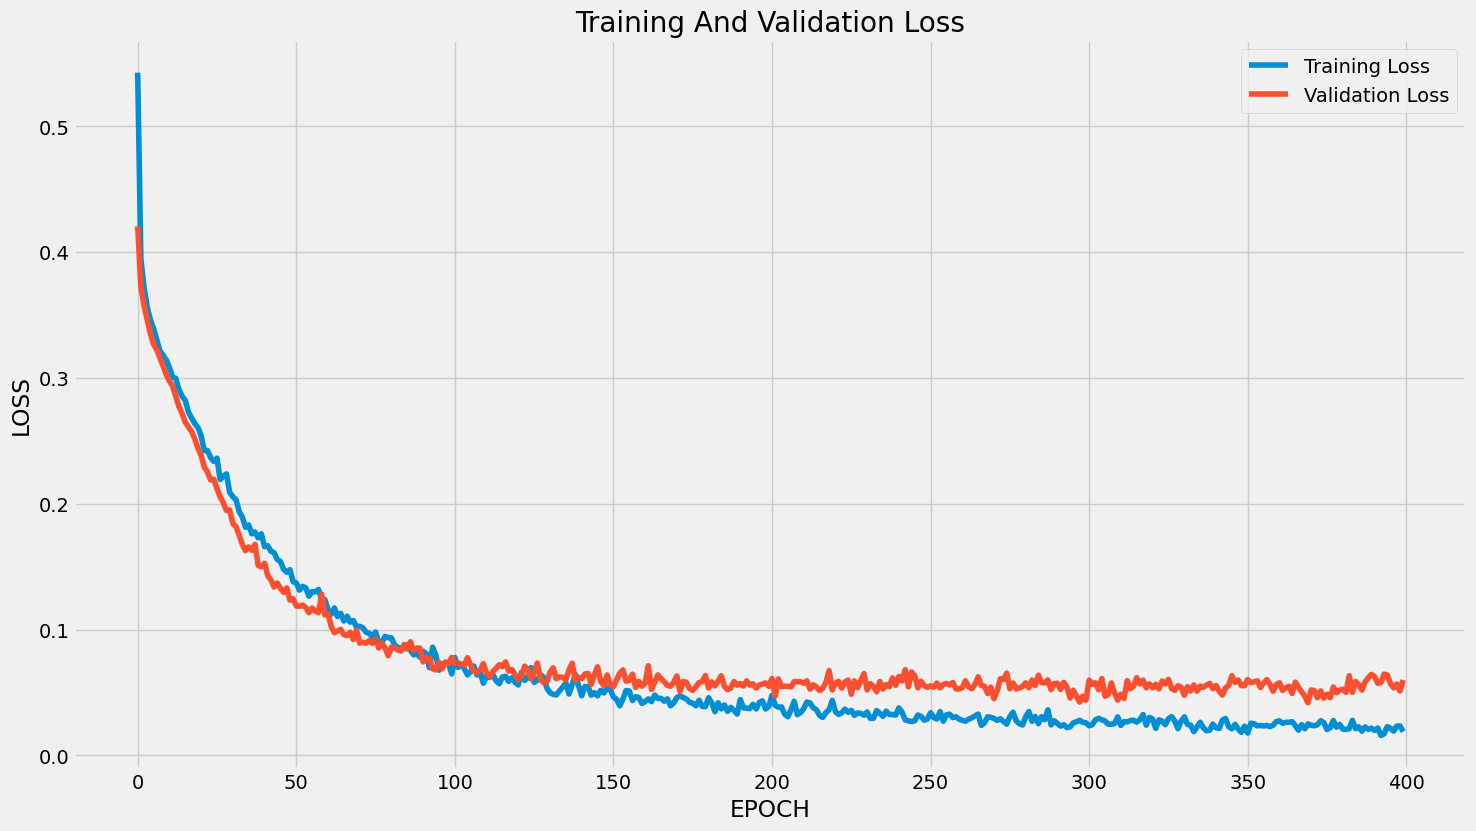

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Training Acc')
plt.plot(val_acc, label='Validation Acc')
plt.title('Training And Validation Accuracy')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend(['TRAIN Accuracy', 'VALIDATION Accuracy'], loc='upper left')
plt.rcParams["figure.figsize"] = [16,9]
plt.legend()
plt.show()

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training And Validation Loss')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['TRAIN Loss', 'VALIDATION Loss'], loc='upper left')
plt.rcParams["figure.figsize"] = [16,9]
plt.legend()
plt.show()

## USE BatchNormalization


In [94]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import BatchNormalization

# تابع تغییر نرخ یادگیری
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 150:
        lr *= 0.5e-3
    elif epoch > 120:
        lr *= 1e-3
    elif epoch > 80:
        lr *= 1e-2
    elif epoch > 40:
        lr *= 1e-1
    return lr

# مدل
model = Sequential()
model.add(Dense(400, activation='relu', input_shape=(10,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# کامپایل مدل با افزودن نرم‌افزار Adam
model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# اضافه کردن Callback برای استفاده از تغییر نرخ یادگیری
lr_scheduler = LearningRateScheduler(lr_schedule)
history = model.fit(X_train, y_train, 
                    batch_size=512, 
                    epochs=300,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler])

Epoch 1/300
12/12 [==============================] - 2s 26ms/step - loss: 0.4476 - accuracy: 0.7975 - val_loss: 0.5469 - val_accuracy: 0.8096 - lr: 0.0010
Epoch 2/300
12/12 [==============================] - 0s 10ms/step - loss: 0.3685 - accuracy: 0.8394 - val_loss: 0.5618 - val_accuracy: 0.8289 - lr: 0.0010
Epoch 3/300
12/12 [==============================] - 0s 11ms/step - loss: 0.3337 - accuracy: 0.8526 - val_loss: 0.5329 - val_accuracy: 0.8258 - lr: 0.0010
Epoch 4/300
12/12 [==============================] - 0s 10ms/step - loss: 0.3304 - accuracy: 0.8587 - val_loss: 0.5230 - val_accuracy: 0.7896 - lr: 0.0010
Epoch 5/300
12/12 [==============================] - 0s 11ms/step - loss: 0.3063 - accuracy: 0.8701 - val_loss: 0.5173 - val_accuracy: 0.8069 - lr: 0.0010
Epoch 6/300
12/12 [==============================] - 0s 10ms/step - loss: 0.2993 - accuracy: 0.8680 - val_loss: 0.5039 - val_accuracy: 0.8023 - lr: 0.0010
Epoch 7/300
12/12 [==============================] - 0s 11ms/step - lo

12/12 [==============================] - 0s 10ms/step - loss: 0.1128 - accuracy: 0.9597 - val_loss: 0.1193 - val_accuracy: 0.9580 - lr: 1.0000e-05
Epoch 105/300
12/12 [==============================] - 0s 11ms/step - loss: 0.1118 - accuracy: 0.9617 - val_loss: 0.1193 - val_accuracy: 0.9572 - lr: 1.0000e-05
Epoch 106/300
12/12 [==============================] - 0s 10ms/step - loss: 0.1100 - accuracy: 0.9592 - val_loss: 0.1194 - val_accuracy: 0.9576 - lr: 1.0000e-05
Epoch 107/300
12/12 [==============================] - 0s 10ms/step - loss: 0.1142 - accuracy: 0.9561 - val_loss: 0.1193 - val_accuracy: 0.9576 - lr: 1.0000e-05
Epoch 108/300
12/12 [==============================] - 0s 11ms/step - loss: 0.1177 - accuracy: 0.9584 - val_loss: 0.1192 - val_accuracy: 0.9576 - lr: 1.0000e-05
Epoch 109/300
12/12 [==============================] - 0s 10ms/step - loss: 0.1121 - accuracy: 0.9561 - val_loss: 0.1189 - val_accuracy: 0.9584 - lr: 1.0000e-05
Epoch 110/300
12/12 [===========================

Epoch 155/300
12/12 [==============================] - 0s 10ms/step - loss: 0.1145 - accuracy: 0.9579 - val_loss: 0.1185 - val_accuracy: 0.9584 - lr: 5.0000e-07
Epoch 156/300
12/12 [==============================] - 0s 10ms/step - loss: 0.1066 - accuracy: 0.9612 - val_loss: 0.1185 - val_accuracy: 0.9584 - lr: 5.0000e-07
Epoch 157/300
12/12 [==============================] - 0s 10ms/step - loss: 0.1105 - accuracy: 0.9617 - val_loss: 0.1185 - val_accuracy: 0.9584 - lr: 5.0000e-07
Epoch 158/300
12/12 [==============================] - 0s 11ms/step - loss: 0.1123 - accuracy: 0.9585 - val_loss: 0.1185 - val_accuracy: 0.9584 - lr: 5.0000e-07
Epoch 159/300
12/12 [==============================] - 0s 10ms/step - loss: 0.1100 - accuracy: 0.9602 - val_loss: 0.1186 - val_accuracy: 0.9584 - lr: 5.0000e-07
Epoch 160/300
12/12 [==============================] - 0s 10ms/step - loss: 0.1082 - accuracy: 0.9618 - val_loss: 0.1184 - val_accuracy: 0.9584 - lr: 5.0000e-07
Epoch 161/300
12/12 [=============

Epoch 206/300
12/12 [==============================] - 0s 10ms/step - loss: 0.1087 - accuracy: 0.9610 - val_loss: 0.1184 - val_accuracy: 0.9584 - lr: 5.0000e-07
Epoch 207/300
12/12 [==============================] - 0s 10ms/step - loss: 0.1114 - accuracy: 0.9595 - val_loss: 0.1181 - val_accuracy: 0.9584 - lr: 5.0000e-07
Epoch 208/300
12/12 [==============================] - 0s 10ms/step - loss: 0.1161 - accuracy: 0.9580 - val_loss: 0.1180 - val_accuracy: 0.9588 - lr: 5.0000e-07
Epoch 209/300
12/12 [==============================] - 0s 10ms/step - loss: 0.1076 - accuracy: 0.9604 - val_loss: 0.1180 - val_accuracy: 0.9588 - lr: 5.0000e-07
Epoch 210/300
12/12 [==============================] - 0s 10ms/step - loss: 0.1140 - accuracy: 0.9589 - val_loss: 0.1180 - val_accuracy: 0.9588 - lr: 5.0000e-07
Epoch 211/300
12/12 [==============================] - 0s 11ms/step - loss: 0.1120 - accuracy: 0.9577 - val_loss: 0.1181 - val_accuracy: 0.9584 - lr: 5.0000e-07
Epoch 212/300
12/12 [=============

Epoch 257/300
12/12 [==============================] - 0s 11ms/step - loss: 0.1129 - accuracy: 0.9612 - val_loss: 0.1180 - val_accuracy: 0.9584 - lr: 5.0000e-07
Epoch 258/300
12/12 [==============================] - 0s 12ms/step - loss: 0.1082 - accuracy: 0.9607 - val_loss: 0.1178 - val_accuracy: 0.9588 - lr: 5.0000e-07
Epoch 259/300
12/12 [==============================] - 0s 11ms/step - loss: 0.1157 - accuracy: 0.9564 - val_loss: 0.1179 - val_accuracy: 0.9584 - lr: 5.0000e-07
Epoch 260/300
12/12 [==============================] - 0s 10ms/step - loss: 0.1053 - accuracy: 0.9607 - val_loss: 0.1180 - val_accuracy: 0.9584 - lr: 5.0000e-07
Epoch 261/300
12/12 [==============================] - 0s 10ms/step - loss: 0.1107 - accuracy: 0.9589 - val_loss: 0.1181 - val_accuracy: 0.9584 - lr: 5.0000e-07
Epoch 262/300
12/12 [==============================] - 0s 12ms/step - loss: 0.1120 - accuracy: 0.9599 - val_loss: 0.1181 - val_accuracy: 0.9584 - lr: 5.0000e-07
Epoch 263/300
12/12 [=============

## Classification models & Kfold cross validation.

The following Machine Learning algorithms will be tested:

1- Logistic Regression
2- DecisionTree Classifier
3- Ensemble Methods:
   * a- Random Forest
   * b- Voting Classifiers
   * c- bagging and Pasting
   * d- Boosting

In [95]:
lr_model = LogisticRegression(max_iter=1000, random_state=0)
lr_model.fit(X_train , y_train)
lr_train_score = lr_model.score(X_train , y_train)

print("Logistic Regression Training Score: {:.3F}".format(lr_train_score))


# LogisticRegression evaluated using shuffle-split cross-validation 
lr_shuffle_split = StratifiedShuffleSplit(train_size=0.8, test_size=0.15, n_splits=5, random_state=0)
lr_val_scores = cross_val_score(lr_model, X_train , y_train, cv=lr_shuffle_split)
print("Logistic Regression Cross validation Score: {:.3F}".format(np.mean(lr_val_scores)))

Logistic Regression Training Score: 0.838
Logistic Regression Cross validation Score: 0.840


In [96]:
# overfitting

dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train , y_train)
dt_train_score = dt_model.score(X_train , y_train)

print("DecisionTree Classifier Training Score: {:.3F}".format(dt_train_score))


# DecisionTreeClassifier evaluated using shuffle-split cross-validation 
dt_shuffle_split = StratifiedShuffleSplit(train_size=0.8, test_size=0.2, n_splits=5, random_state=0)
dt_val_scores = cross_val_score(dt_model, X_train , y_train, cv=dt_shuffle_split)
print("DecisionTree Classifier Cross validation Score: {:.3F}".format(np.mean(dt_val_scores)))

DecisionTree Classifier Training Score: 1.000
DecisionTree Classifier Cross validation Score: 0.916


## Ensemble Methods

In [97]:
rf_model = RandomForestClassifier(n_estimators=100,
                                  max_leaf_nodes=10,
                                  bootstrap=True,  # Set to True
                                  max_samples=100,
                                  n_jobs=-1,
                                  random_state=0)

rf_model.fit(X_train, y_train)
rf_train_score = rf_model.score(X_train, y_train)

print("Random Forest Training Score: {:.3F}".format(rf_train_score))


# RandomForestClassifier evaluated using shuffle-split cross-validation 
rf_shuffle_split = StratifiedShuffleSplit(train_size=0.8, test_size=0.2, n_splits=5, random_state=0)
rf_val_scores = cross_val_score(rf_model, X_train , y_train, cv=rf_shuffle_split)
print("Random Forest Cross validation Score: {:.3F}".format(np.mean(rf_val_scores)))

Random Forest Training Score: 0.858
Random Forest Cross validation Score: 0.856


## Voting Classifiers

In [98]:
# Hard Voting 
v_log_clf = LogisticRegression(max_iter=1000, random_state=0)
v_random_forest = RandomForestClassifier()
v_dt = DecisionTreeClassifier(random_state=0)


hard_voting_model = VotingClassifier(estimators=[("lr",v_log_clf),
                                            ("rf",v_random_forest),
                                            ("DT",v_dt)],
                               voting='hard')

hard_voting_model.fit(X_train , y_train)
hard_voting_train_score = hard_voting_model.score(X_train , y_train)

print("Hard Voting Classifiers Training Score: {:.3F}".format(hard_voting_train_score))


# VotingClassifier evaluated using shuffle-split cross-validation 
hard_voting_shuffle_split = StratifiedShuffleSplit(train_size=0.8, test_size=0.2, n_splits=5, random_state=0)
hard_voting_val_scores = cross_val_score(hard_voting_model, X_train , y_train, cv=hard_voting_shuffle_split)
print("Hard Voting Classifiers Cross validation Score: {:.3F}".format(np.mean(hard_voting_val_scores)))

Hard Voting Classifiers Training Score: 1.000
Hard Voting Classifiers Cross validation Score: 0.944


In [99]:
# Soft Voting
v_log_clf = LogisticRegression(max_iter=1000, random_state=0)
v_random_forest = RandomForestClassifier()
v_dt = DecisionTreeClassifier(random_state=0)


soft_voting_model = VotingClassifier(estimators=[("lr",v_log_clf),
                                            ("rf",v_random_forest),
                                            ("DT",v_dt)],
                               voting='soft')

soft_voting_model.fit(X_train , y_train)
soft_voting_train_score = soft_voting_model.score(X_train , y_train)

print("Soft Voting Classifiers Training Score: {:.3F}".format(soft_voting_train_score))


# VotingClassifier evaluated using shuffle-split cross-validation 
soft_voting_shuffle_split = StratifiedShuffleSplit(train_size=0.8, test_size=0.2, n_splits=5, random_state=0)
soft_voting_val_scores = cross_val_score(soft_voting_model, X_train , y_train, cv=soft_voting_shuffle_split)
print("Soft Voting Classifiers Cross validation Score: {:.3F}".format(np.mean(soft_voting_val_scores)))

Soft Voting Classifiers Training Score: 1.000
Soft Voting Classifiers Cross validation Score: 0.938


## bagging and Pasting

In [100]:
rf_bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(),
                                     n_estimators=100,
                                     bootstrap=True, #The difference between baggong and pasting
                                     max_samples=100,
                                     n_jobs=-1,
                                     random_state=0)

rf_bagging_model.fit(X_train , y_train)
rf_bagging_train_score = rf_bagging_model.score(X_train , y_train)

print("RandomForest Bagging Classifier Training Score: {:.3F}".format(rf_bagging_train_score))


# BaggingClassifier evaluated using shuffle-split cross-validation 
rf_bagging_shuffle_split = StratifiedShuffleSplit(train_size=0.8, test_size=0.2, n_splits=5, random_state=0)
rf_baggign_val_scores = cross_val_score(rf_bagging_model, X_train , y_train, cv=rf_bagging_shuffle_split)
print("RandomForest Bagging Classifier Cross validation Score: {:.3F}".format(np.mean(rf_baggign_val_scores)))

RandomForest Bagging Classifier Training Score: 0.864
RandomForest Bagging Classifier Cross validation Score: 0.863


## pasting

In [101]:
rf_pasting_model = BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=8,
                                                                             max_leaf_nodes=10,
                                                                             n_estimators=100,
                                                                             n_jobs=-1,
                                                                             random_state=0),
                                     n_estimators=100,
                                     bootstrap=False, #The difference between baggong and pasting
                                     max_samples=100,
                                     n_jobs=-1,
                                     random_state=0)

rf_pasting_model.fit(X_train , y_train)
rf_pasting_train_score = rf_pasting_model.score(X_train , y_train)

print("RandomForest pasting Classifier Training Score: {:.3F}".format(rf_pasting_train_score))


# BaggingClassifier evaluated using shuffle-split cross-validation 
rf_pasting_shuffle_split = StratifiedShuffleSplit(train_size=0.8, test_size=0.2, n_splits=5, random_state=0)
rf_pasting_val_scores = cross_val_score(rf_pasting_model, X_train , y_train, cv=rf_pasting_shuffle_split)
print("RandomForest pasting Classifier Cross validation Score: {:.3F}".format(np.mean(rf_pasting_val_scores)))

RandomForest pasting Classifier Training Score: 0.857
RandomForest pasting Classifier Cross validation Score: 0.857


## Boosting

## AdaBoost

In [102]:
rf_adaboost_model = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=5,
                                                                             max_leaf_nodes=10,
                                                                             n_estimators=100,
                                                                             n_jobs=-1,
                                                                             random_state=0),
                                       
                                       n_estimators=100,
                                       learning_rate=0.1,
                                       algorithm='SAMME.R',
                                       random_state=0)

rf_adaboost_model.fit(X_train , y_train)
rf_adaboost_train_score = rf_adaboost_model.score(X_train , y_train)

print("RandomForestClassifier AdaBoost Classifier Training Score: {:.3F}".format(rf_adaboost_train_score))


# AdaBoostClassifier evaluated using shuffle-split cross-validation 
rf_adaboost_shuffle_split = StratifiedShuffleSplit(train_size=0.8, test_size=0.2, n_splits=5, random_state=0)
rf_adaboost_val_scores = cross_val_score(rf_adaboost_model, X_train , y_train, cv=rf_adaboost_shuffle_split)
print("RandomForestClassifier AdaBoost Classifier Cross validation Score: {:.3F}".format(np.mean(rf_adaboost_val_scores)))

RandomForestClassifier AdaBoost Classifier Training Score: 0.951
RandomForestClassifier AdaBoost Classifier Cross validation Score: 0.939


## GradientBoostingClassifier

In [103]:
g_boosting_model = GradientBoostingClassifier(n_estimators=500,
                                             learning_rate=0.01,
                                             random_state=0,
                                             max_depth=5)

g_boosting_model.fit(X_train , y_train)
g_boosting_train_score = g_boosting_model.score(X_train , y_train)

print("Gradient Boosting Classifier Training Score: {:.3F}".format(g_boosting_train_score))


# GradientBoostingClassifier evaluated using shuffle-split cross-validation 
g_boosting_shuffle_split = StratifiedShuffleSplit(train_size=0.8, test_size=0.2, n_splits=5, random_state=0)
g_boosting_val_scores = cross_val_score(g_boosting_model, X_train , y_train, cv=g_boosting_shuffle_split)
print("Gradient Boosting Classifier Cross validation Score: {:.3F}".format(np.mean(g_boosting_val_scores)))

# overfitting

Gradient Boosting Classifier Training Score: 0.954
Gradient Boosting Classifier Cross validation Score: 0.936


## Deep learning classification model.

In [104]:
inputs = tf.keras.layers.Input(shape=(10,))

x = tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal',
                               kernel_regularizer=tf.keras.regularizers.L2())(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)

x = tf.keras.layers.Dense(128, activation="relu", kernel_initializer='he_normal',
                               kernel_regularizer=tf.keras.regularizers.L2())(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)


output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

nn_model = tf.keras.Model(inputs, output)

In [105]:
nn_model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=["acc"])

In [106]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 20))  # تنظیم اندازه تصویر
tf.keras.utils.plot_model(nn_model, show_shapes=True, rankdir="LR", expand_nested=True

SyntaxError: incomplete input (1973518986.py, line 4)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='acc', patience=10, restore_best_weights=True)

In [ ]:
history = nn_model.fit(X_train, y_train, epochs=400 ,batch_size=64 , callbacks=[early_stopping])

In [ ]:
nn_train_acc = nn_model.evaluate(X_train, y_train)[1]
nn_test_acc = nn_model.evaluate(X_test, y_test)[1]

## Final Analysis and comparison.

In [ ]:
train_scores = [lr_train_score, dt_train_score,
                rf_train_score, hard_voting_train_score,
                soft_voting_train_score, 
                rf_bagging_train_score, rf_pasting_train_score,
                rf_adaboost_train_score, g_boosting_train_score]


cross_val_scores = [lr_val_scores, dt_val_scores,
                    rf_val_scores, hard_voting_val_scores,
                    soft_voting_val_scores, rf_baggign_val_scores,
                    rf_pasting_val_scores, rf_adaboost_val_scores,
                    g_boosting_val_scores]

In [ ]:
mean_cross_val_scores = []

for i in cross_val_scores: 
    mean_cross_val_scores.append(np.mean(i))

In [ ]:
models = [lr_model, dt_model, rf_model,
          hard_voting_model, soft_voting_model,
          rf_bagging_model, rf_pasting_model,
          rf_adaboost_model, g_boosting_model]


test_scores = []

for model in models:
    test_score = model.score(X_test, y_test)
    test_scores.append(test_score)

In [ ]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression','Decision Tree Classifier',
               'Random Forest',
               'Hard Voting Classifiers', 'Soft Voting Classifiers',
               'Bagging Classifier using RandomForestClassifier',
               'Pasting Classifier using RandomForestClassifier',
               'AdaBoost Classifier using RandomForestClassifier',
               'Gradient Boosting Classifier'],
    
    
    'Training Accuracy': train_scores,
    
    
    'Cross Validation Accuracy': mean_cross_val_scores,

    'Testset Accuracy': test_scores})

In [ ]:
models.loc[len(models.index)] = ['Neural Network', nn_train_acc, '-', nn_test_acc]

models